#### 시그모이드함수 (sigmoid function)

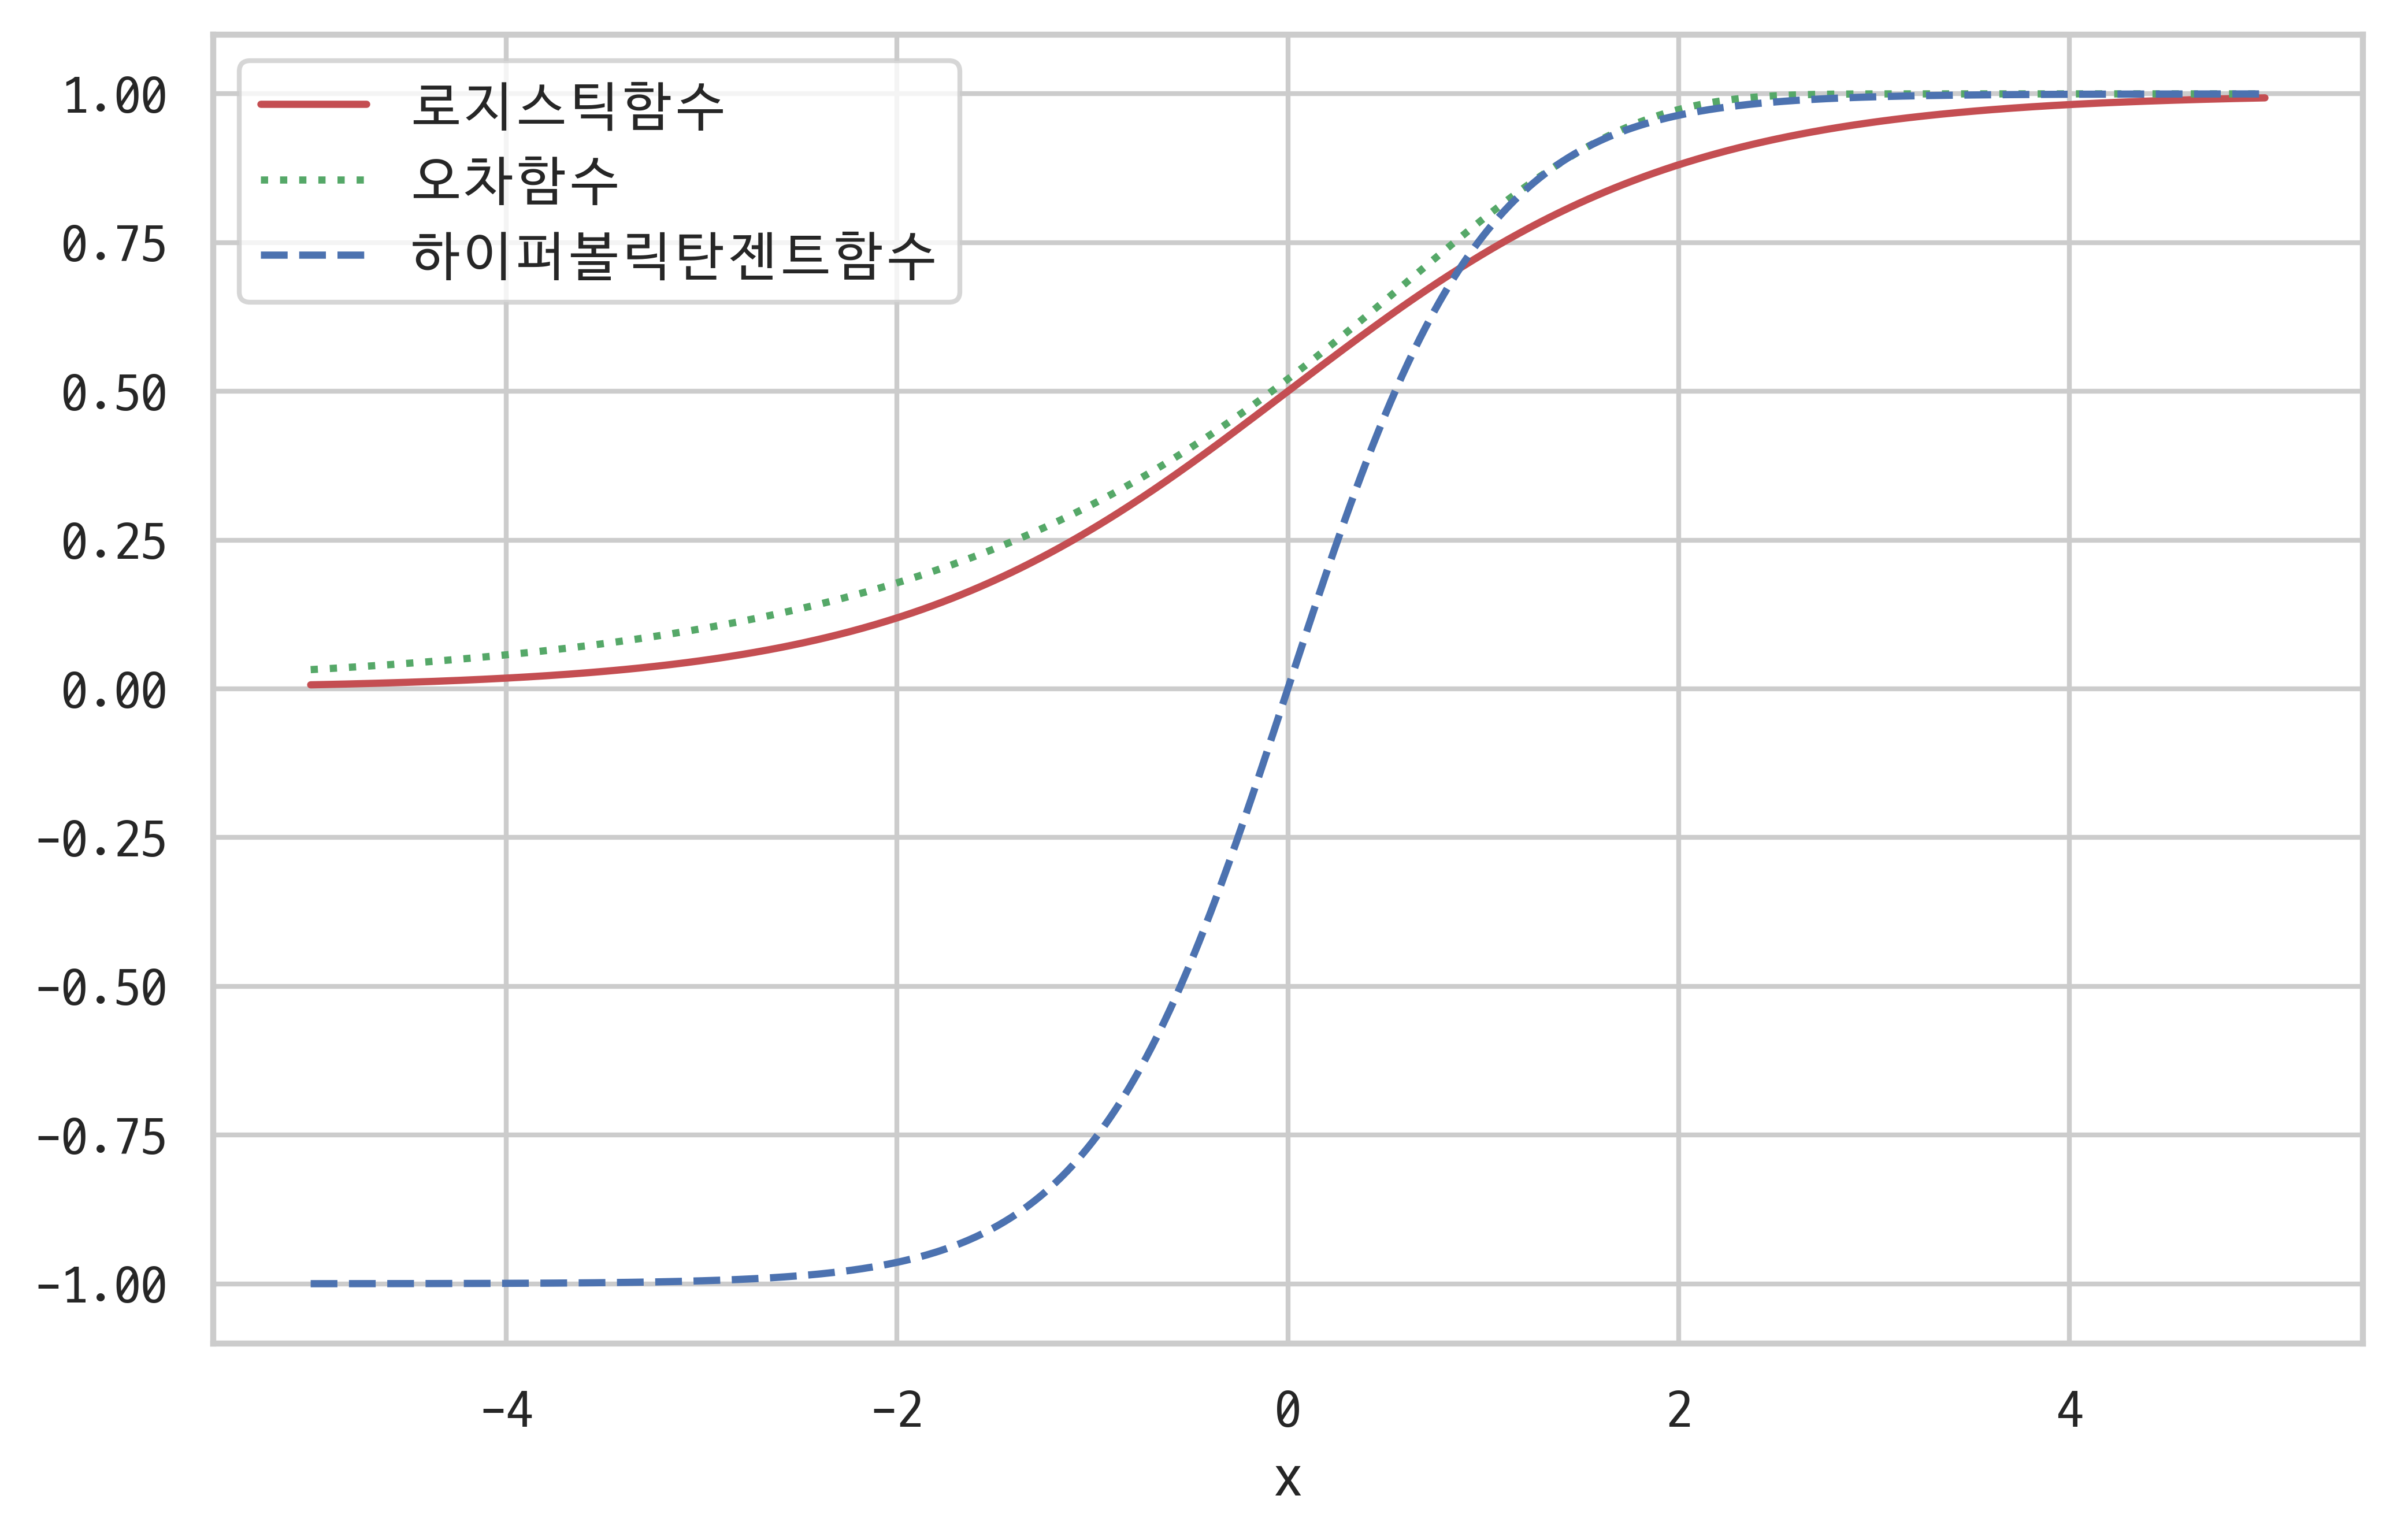

In [1]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label='로지스틱함수')
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)**xx), 'g:', label='오차함수')
plt.plot(xx, np.tanh(xx), 'b--', label='하이퍼볼릭탄젠트함수')
plt.ylim([-1.1, 1.1])
plt.xlabel('x')
plt.legend(loc=2)
plt.show()

#### Statsmodels 패키지의 로지스틱 회귀

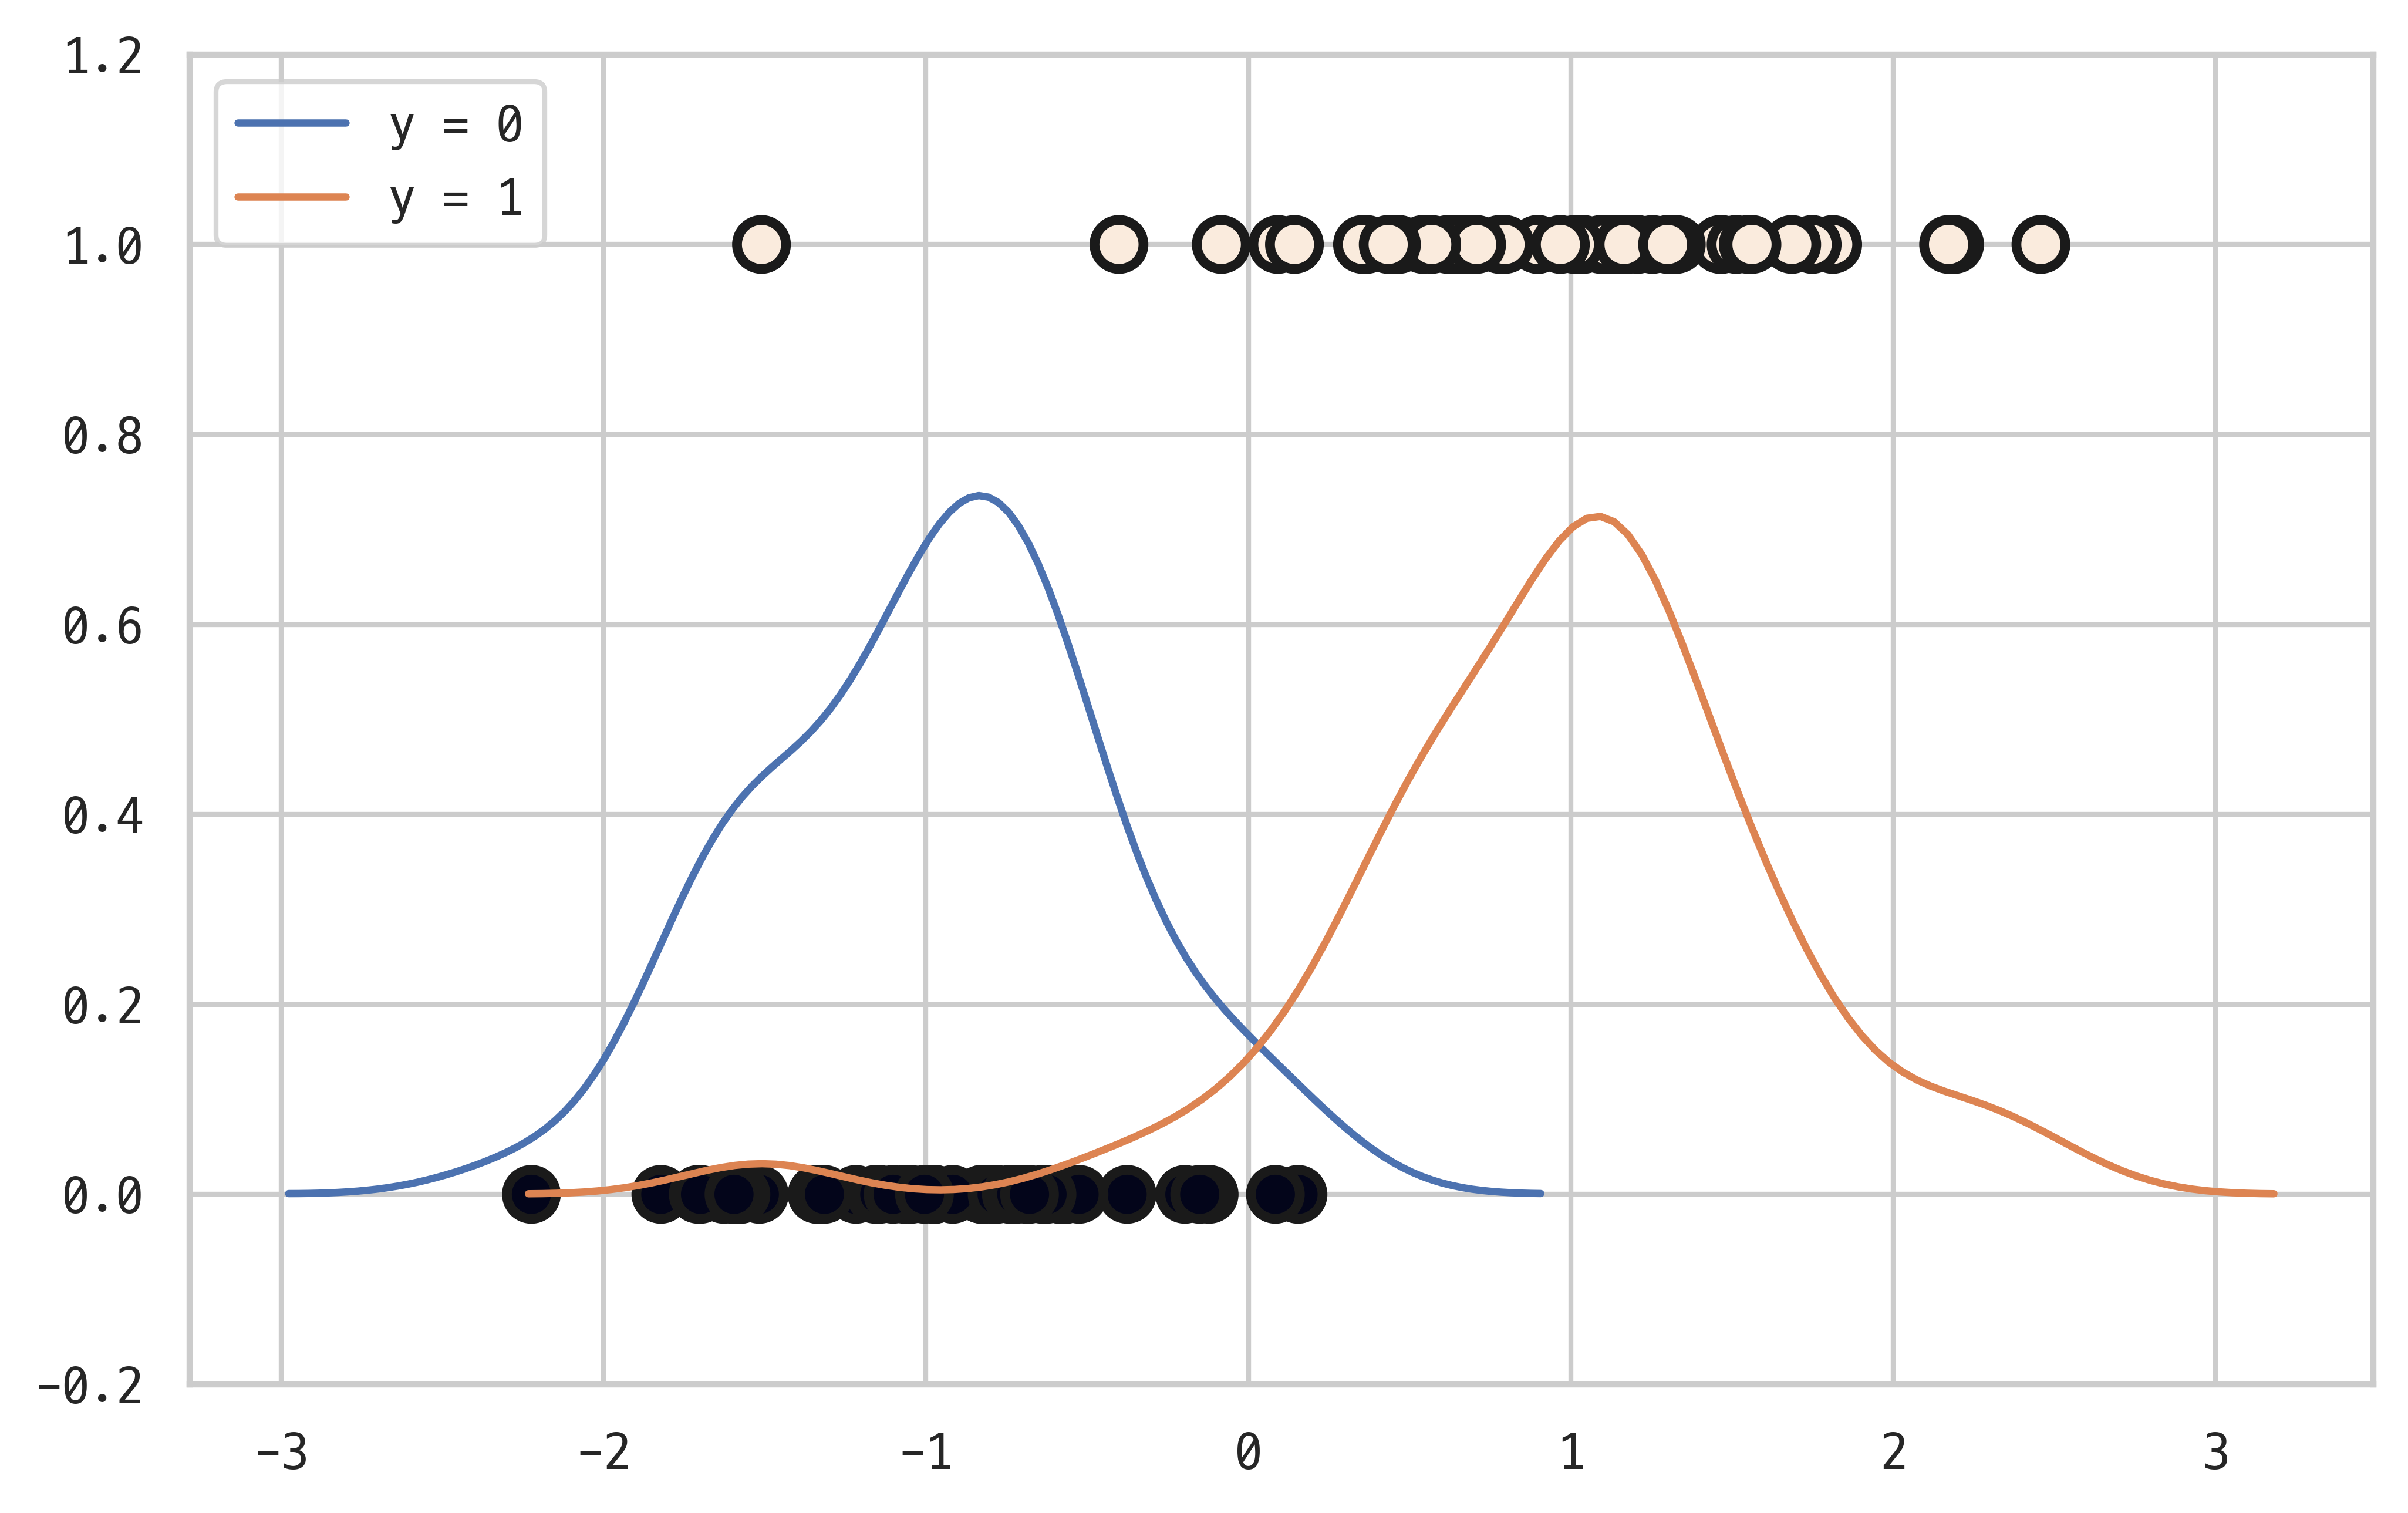

In [3]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=2)
sns.distplot(X0[y == 0, :], label='y = 0', hist=False)
sns.distplot(X0[y == 1, :], label='y = 1', hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

In [6]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Nov 2020   Pseudo R-squ.:                  0.7679
Time:                        17:58:01   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


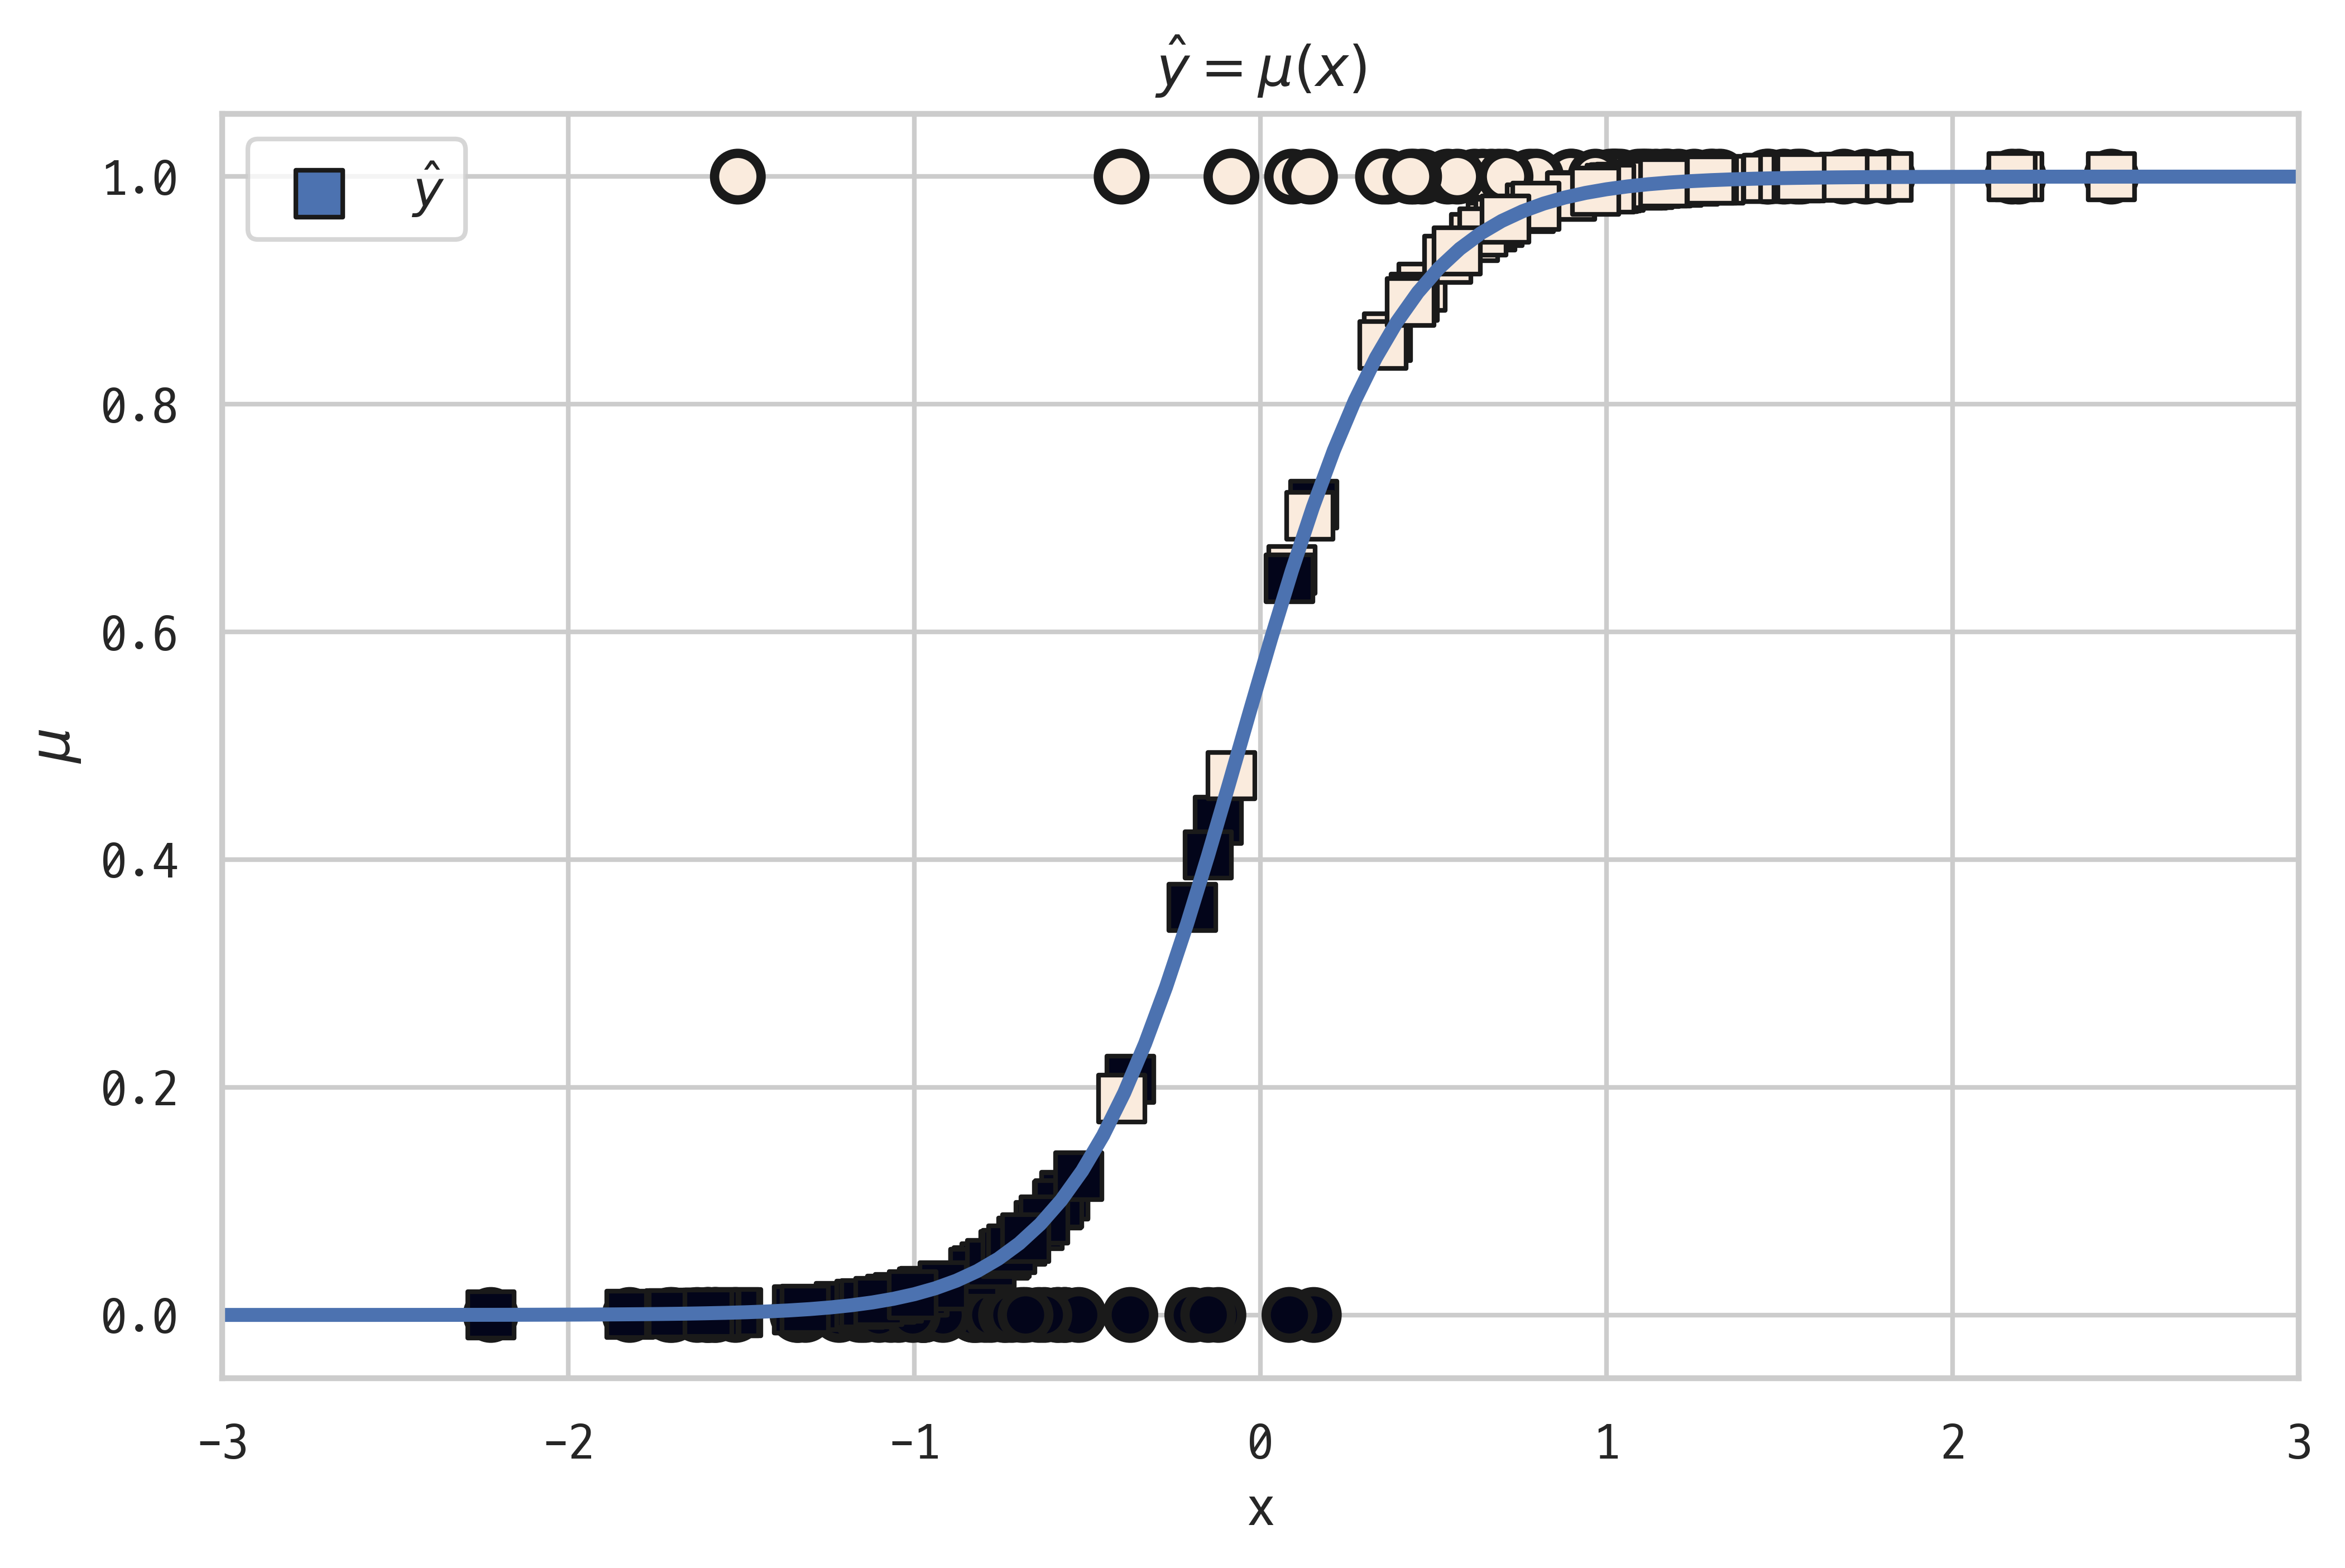

In [7]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=2)
plt.scatter(X0, logit_res.predict(X), label=r'$\hat{y}$', marker='s', c=y, s=100, edgecolor='k', lw=1)
plt.xlim(-3, 3)
plt.xlabel('x')
plt.ylabel(r'$\mu$')
plt.title(r'$\hat{y} = \mu(x)$')
plt.legend()
plt.show()

#### 판별함수

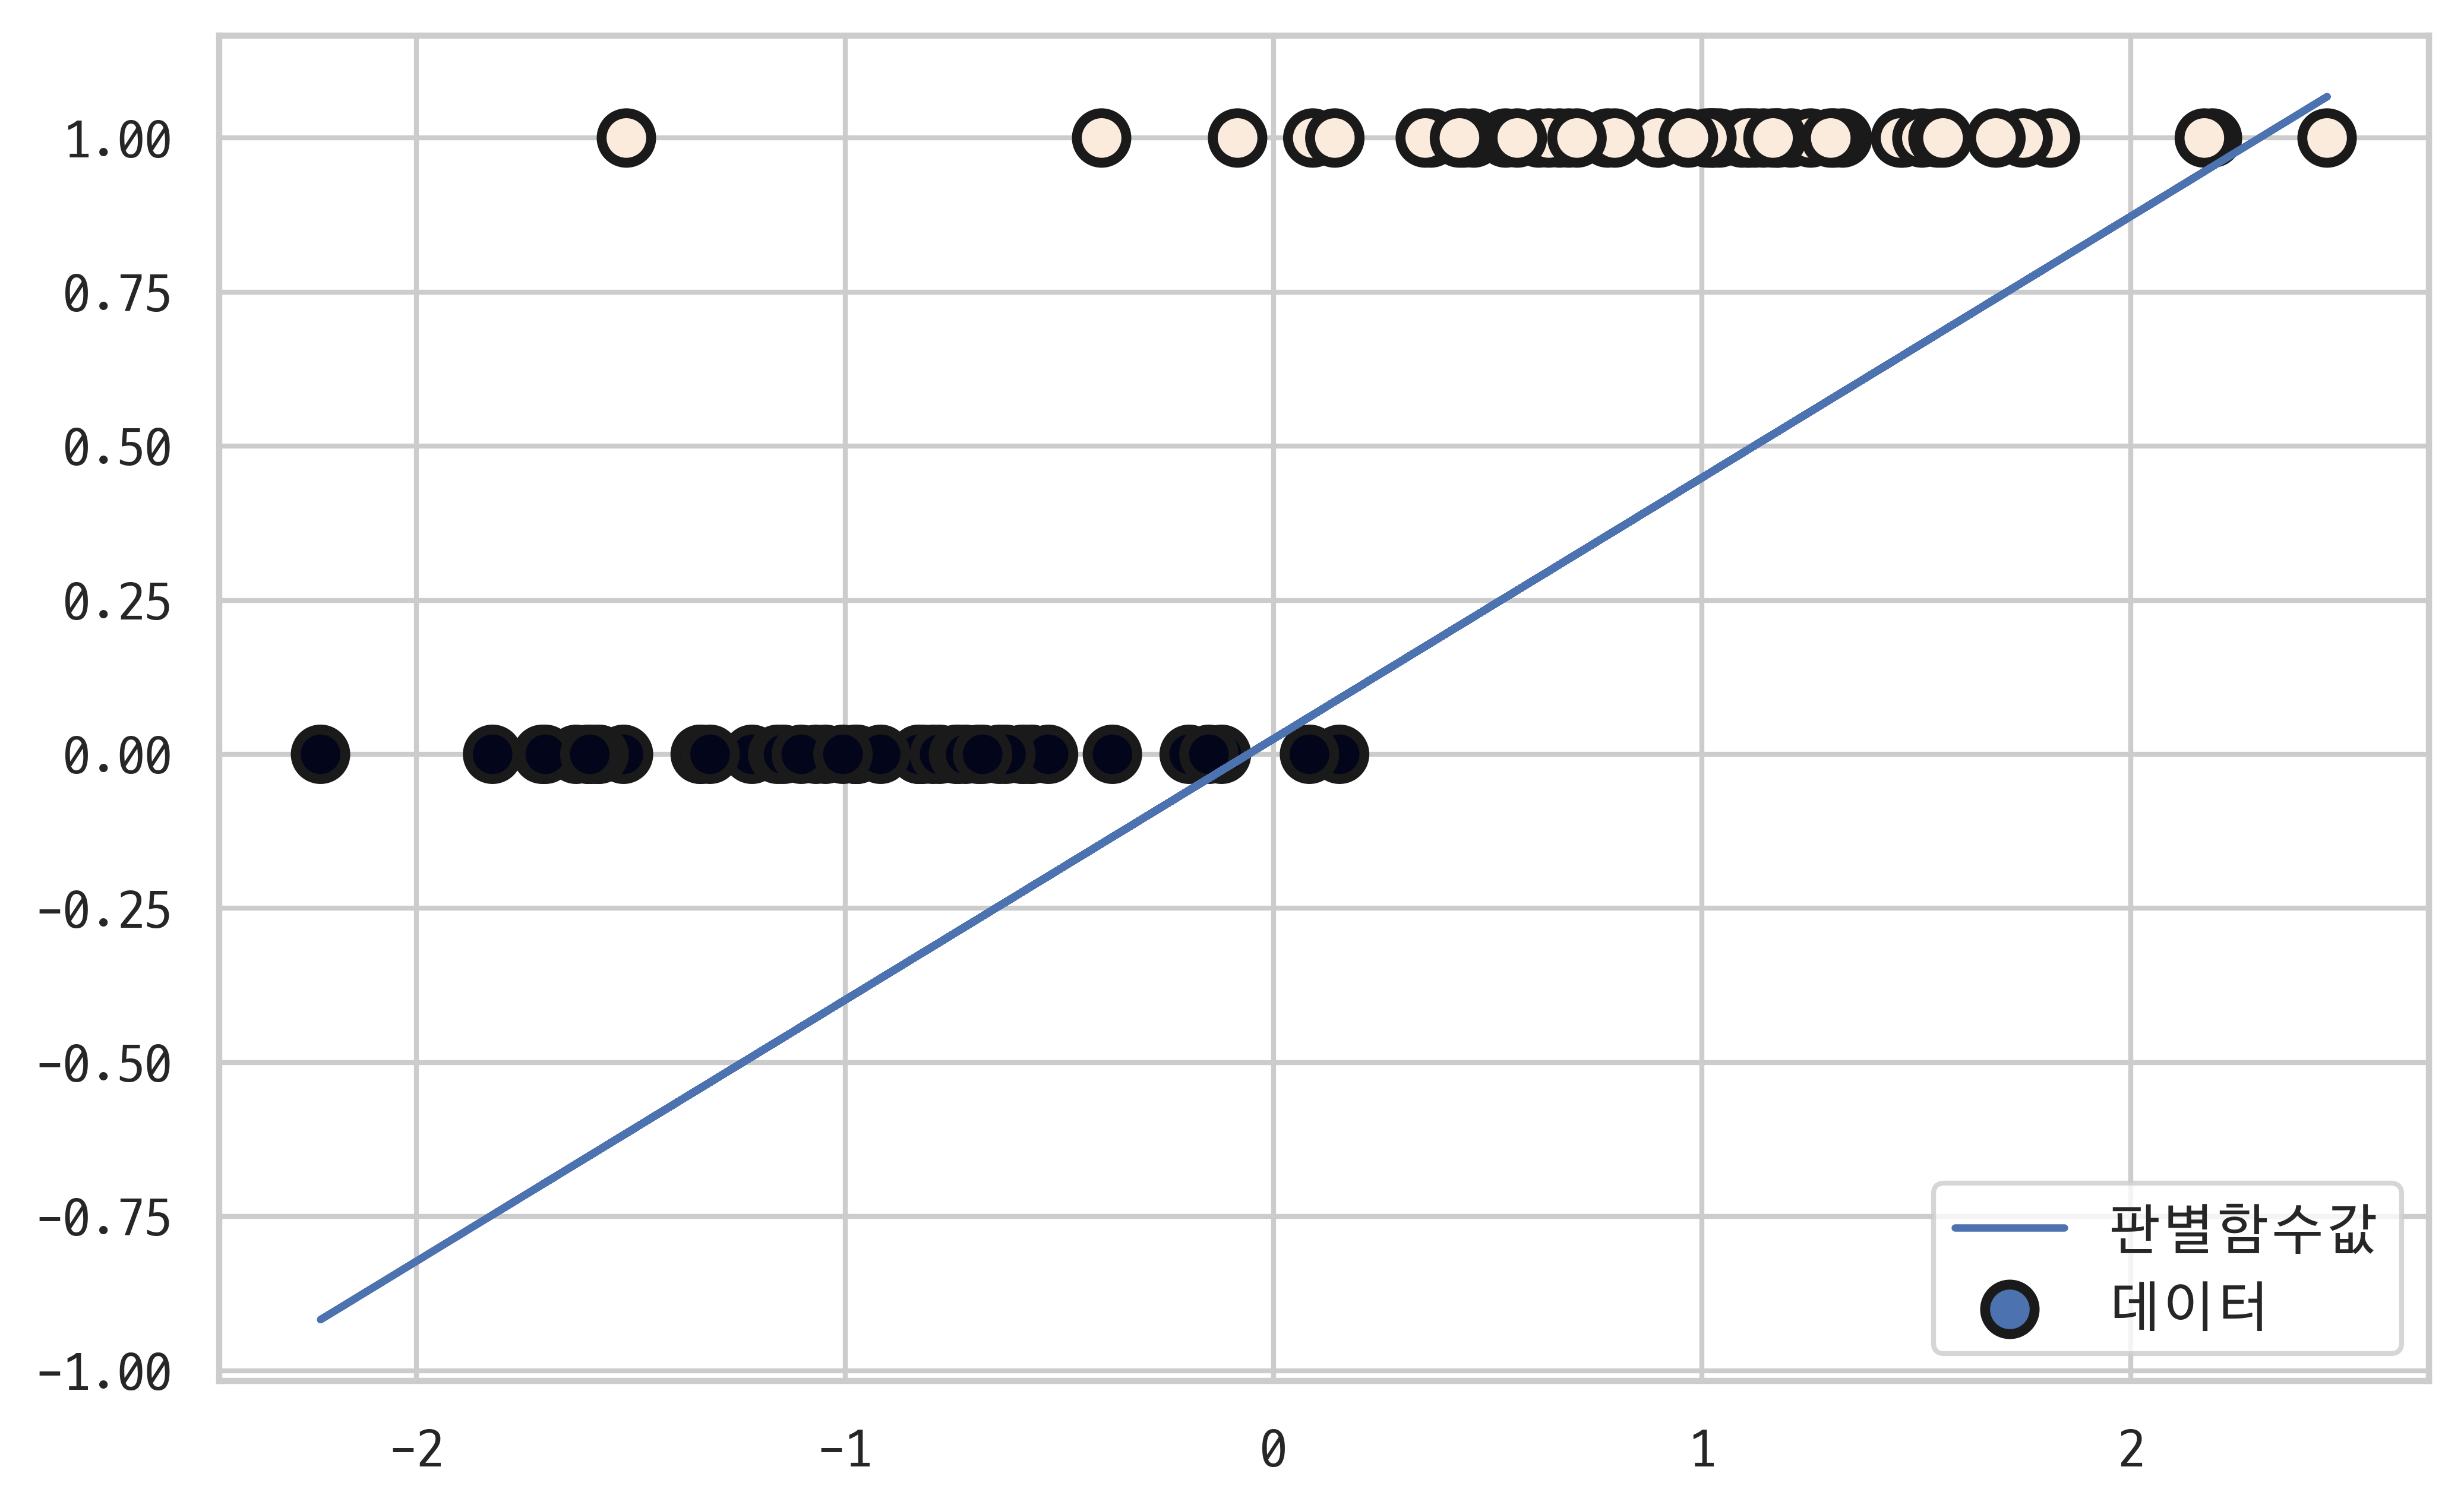

In [8]:
plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=2, label='데이터')
plt.plot(X0, logit_res.fittedvalues * 0.1, label='판별함수값')
plt.legend()
plt.show()

#### 로지스틱 회귀 성능 추정

In [9]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084355200413036

In [10]:
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [11]:
y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)

69.29471672244784

In [12]:
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7678848264170398

#### Scikit-Learn 패키지의 로지스틱 회귀

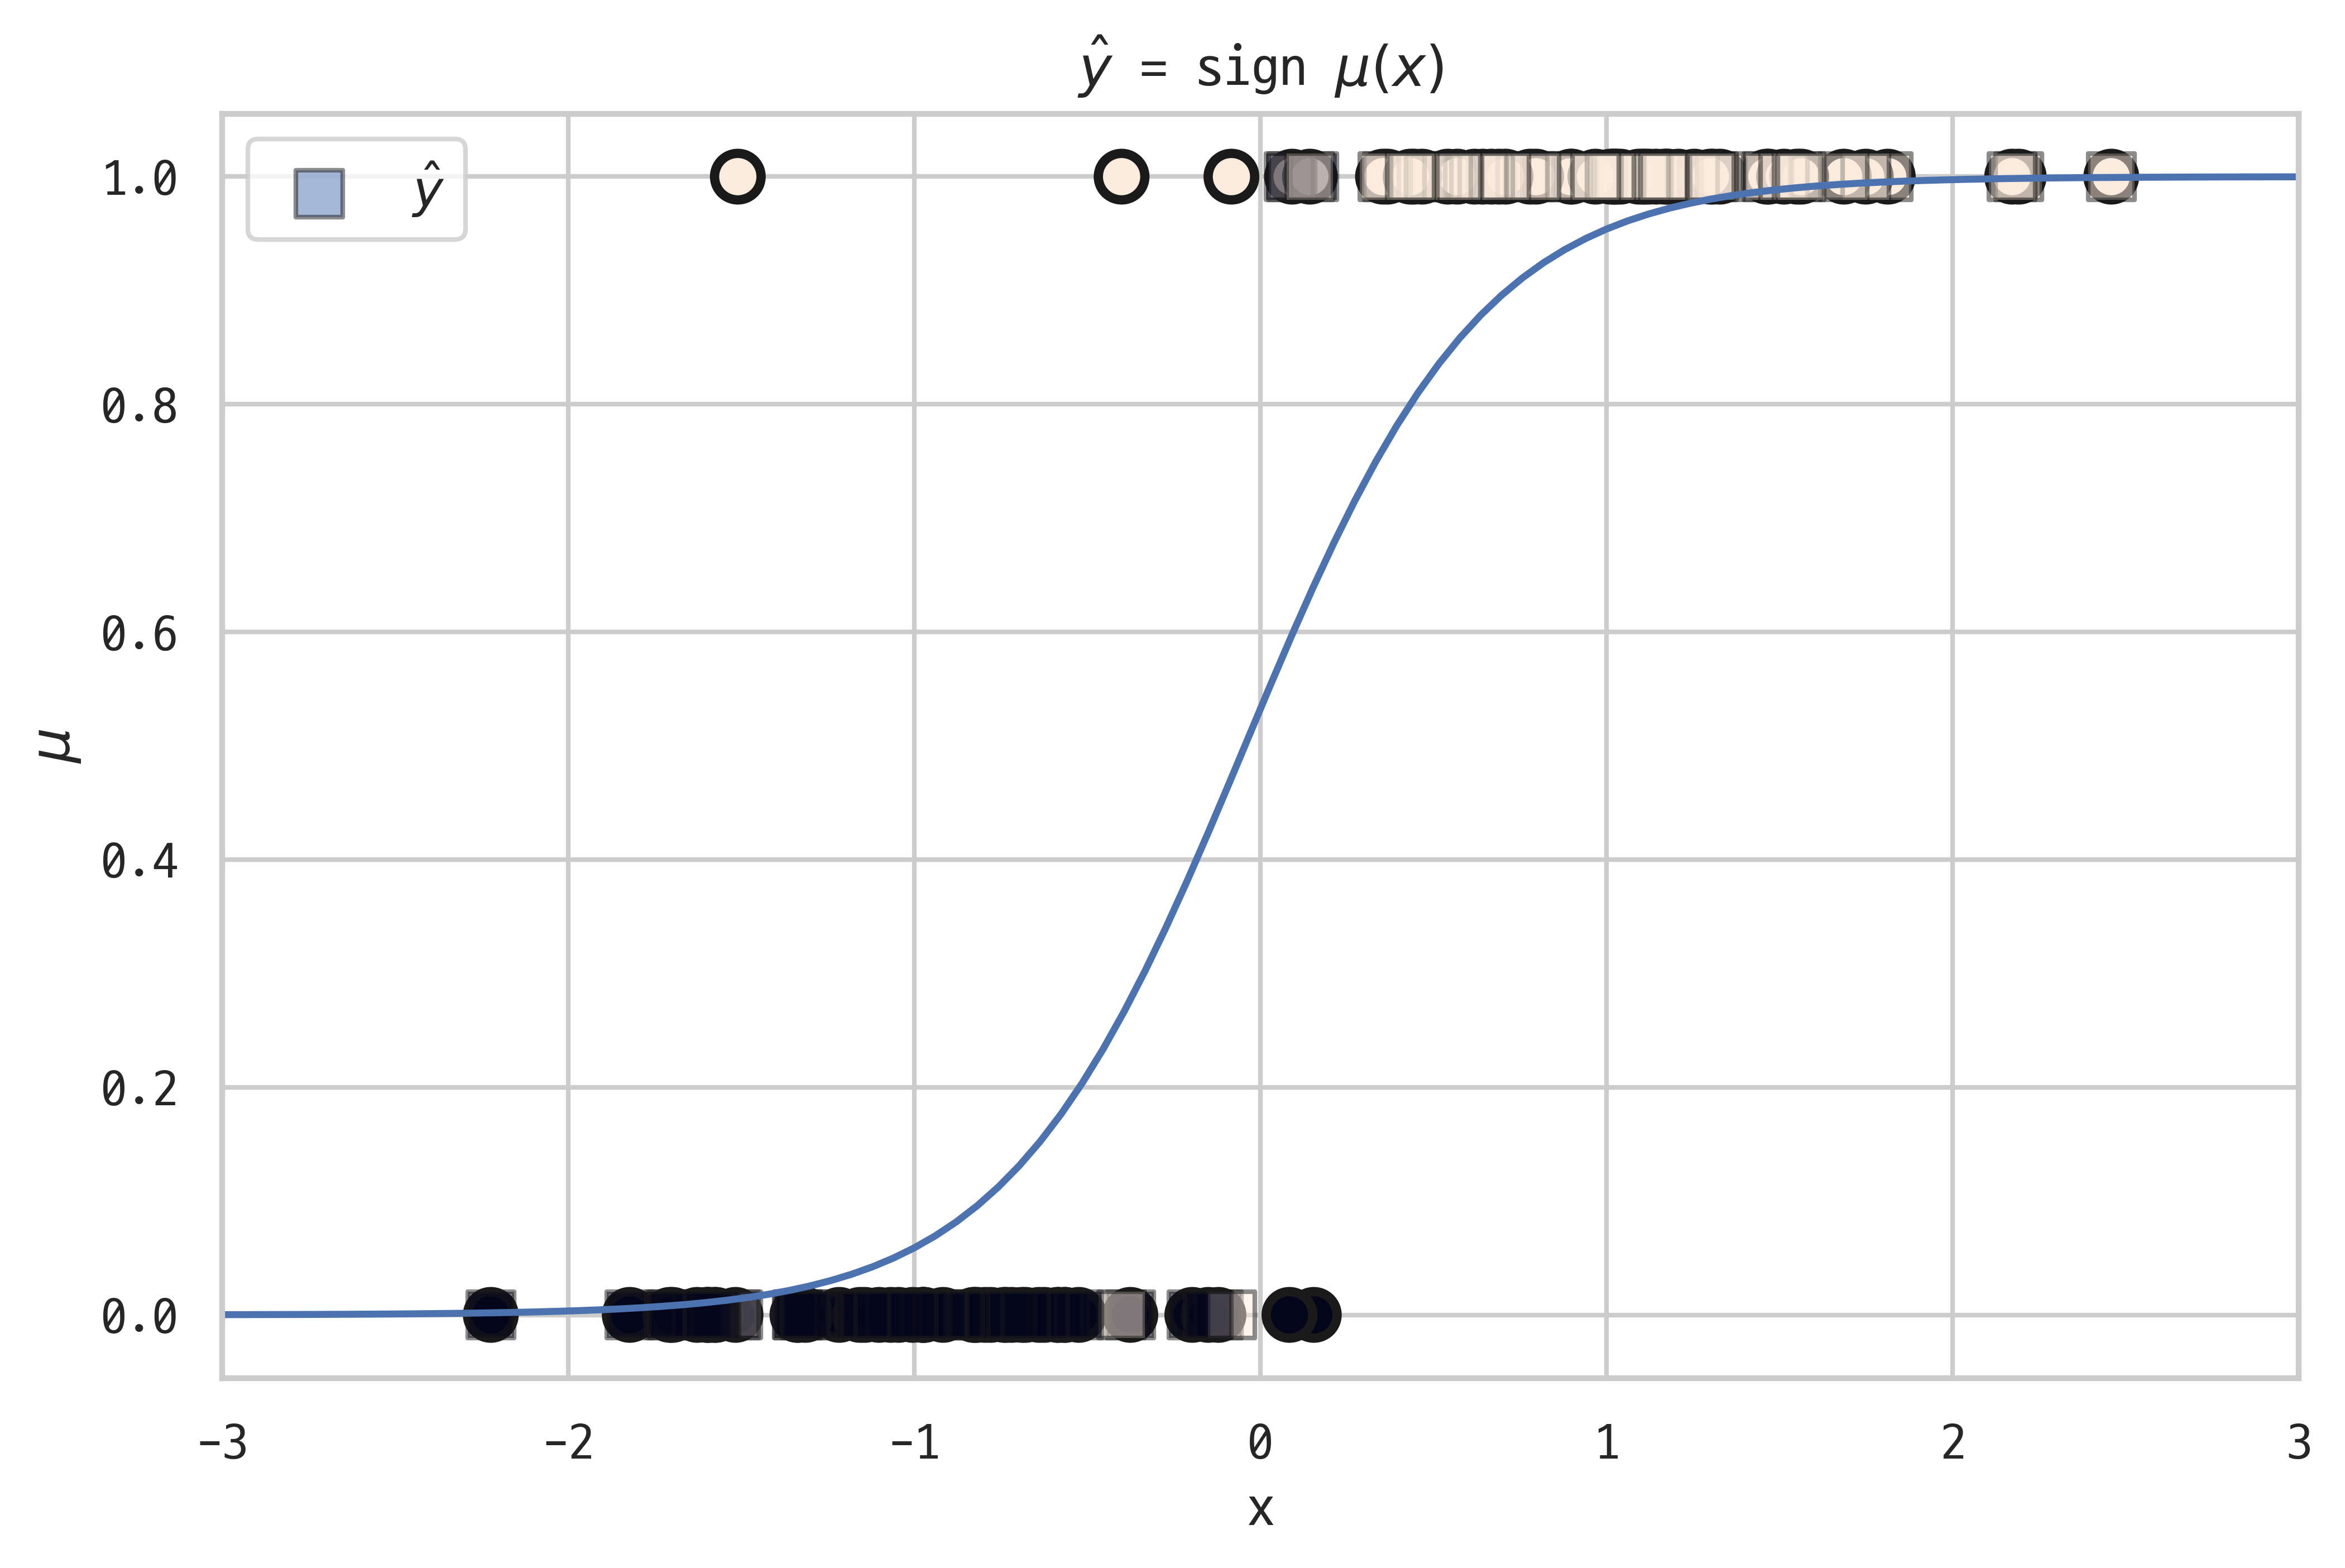

In [14]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
mu = 1.0 / (1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))
plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=2)
plt.scatter(X0, model_sk.predict(X0), label=r'$\hat{y}$', marker='s', c=y, s=100, edgecolor='k', lw=1, alpha=0.5)
plt.xlim(-3, 3)
plt.xlabel('x')
plt.ylabel(r'$\mu$')
plt.title(r'$\hat{y}$ = sign $\mu(x)$')
plt.legend()
plt.show()

#### Ex. 12.1.1

In [8]:
# 1 : 꽃받침 길이를 사용하여 세토사와 베르시칼라 데이터를 구분하는 모델 생성
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X0 = iris.data[idx, :1]
X = sm.add_constant(X0)
y = iris.target[idx]

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Nov 2020   Pseudo R-squ.:                  0.5368
Time:                        23:54:26   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


In [9]:
logit_res.params

array([-27.83145099,   5.14033614])

In [11]:
# 세토사와 베르시칼라를 구분하는 기준값으로 사용되는 꽃받침 길이 (교과서 기준)
(0.5 + 27.8315) / 5.1403

5.511643289302181

In [12]:
# 세토사와 베르시칼라를 구분하는 기준값으로 사용되는 꽃받침 길이 (동영상 기준)
- logit_res.params[0] / logit_res.params[1]

5.41432510257189

In [13]:
# 2 : 분류결과표와 분류결과보고서로 모델 표현하기
y_pred = logit_res.predict(X) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



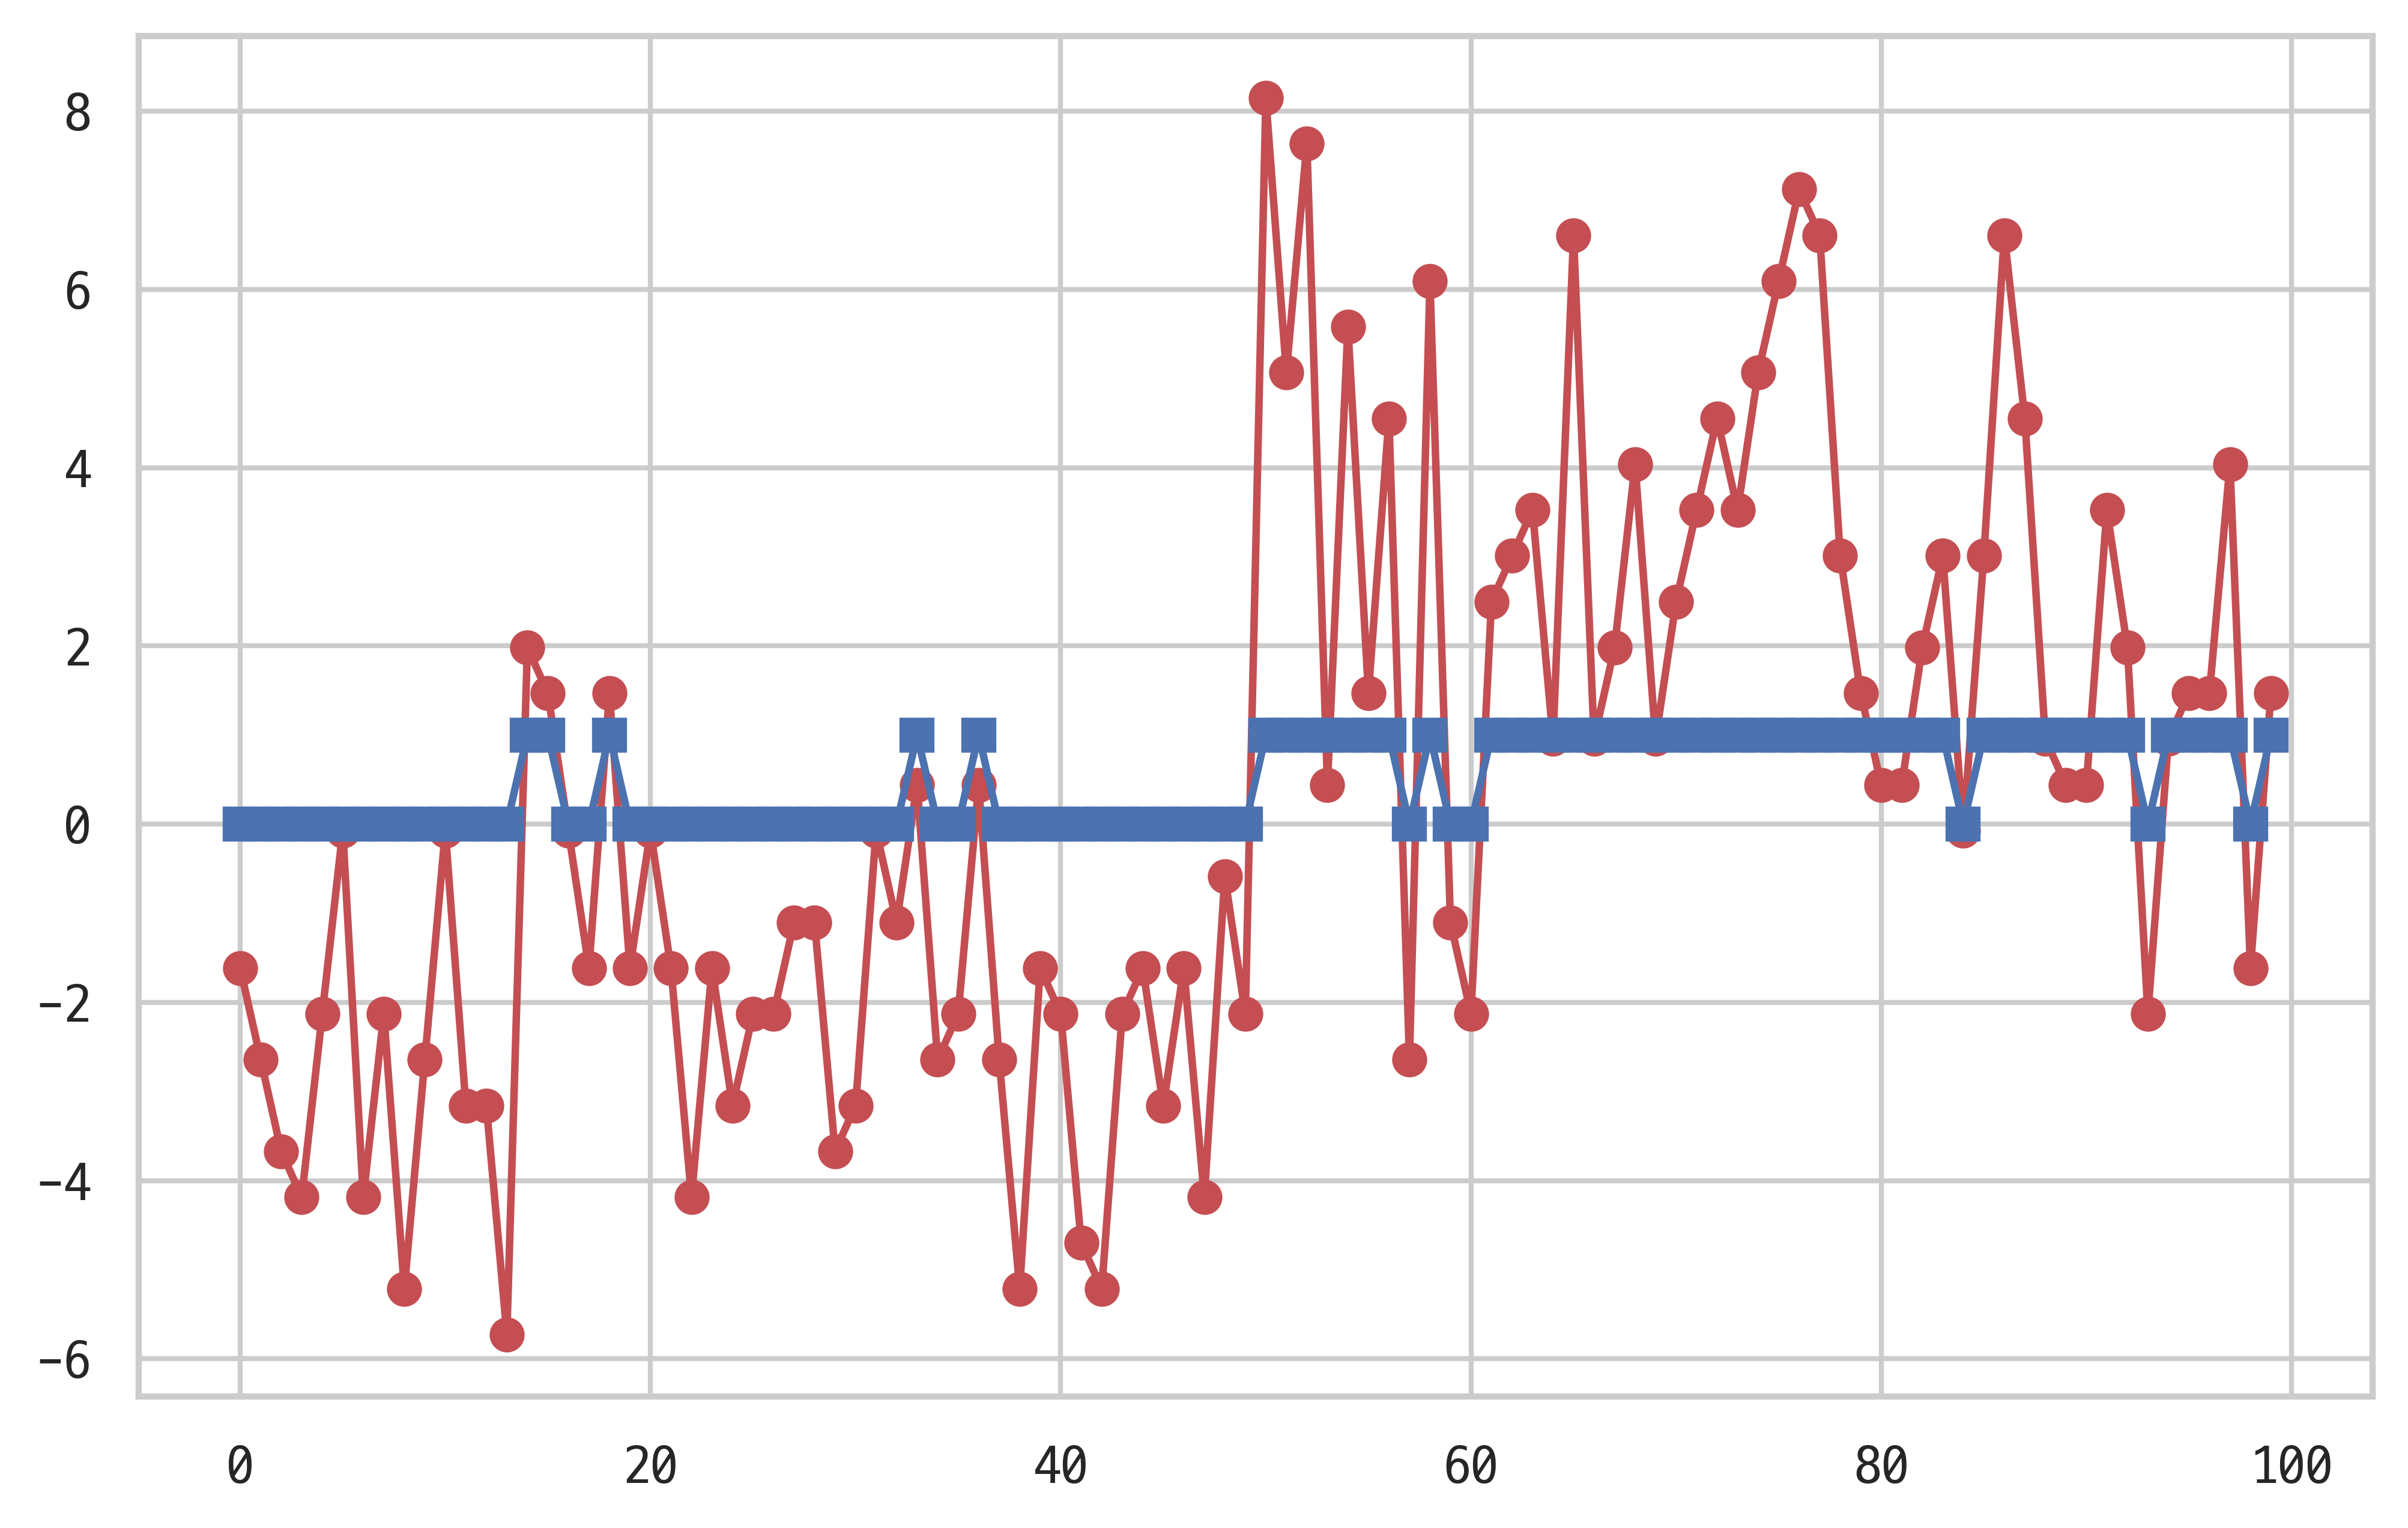

In [17]:
plt.plot(logit_res.fittedvalues, 'ro-')
plt.plot(y_pred, 'bs-')
plt.show()

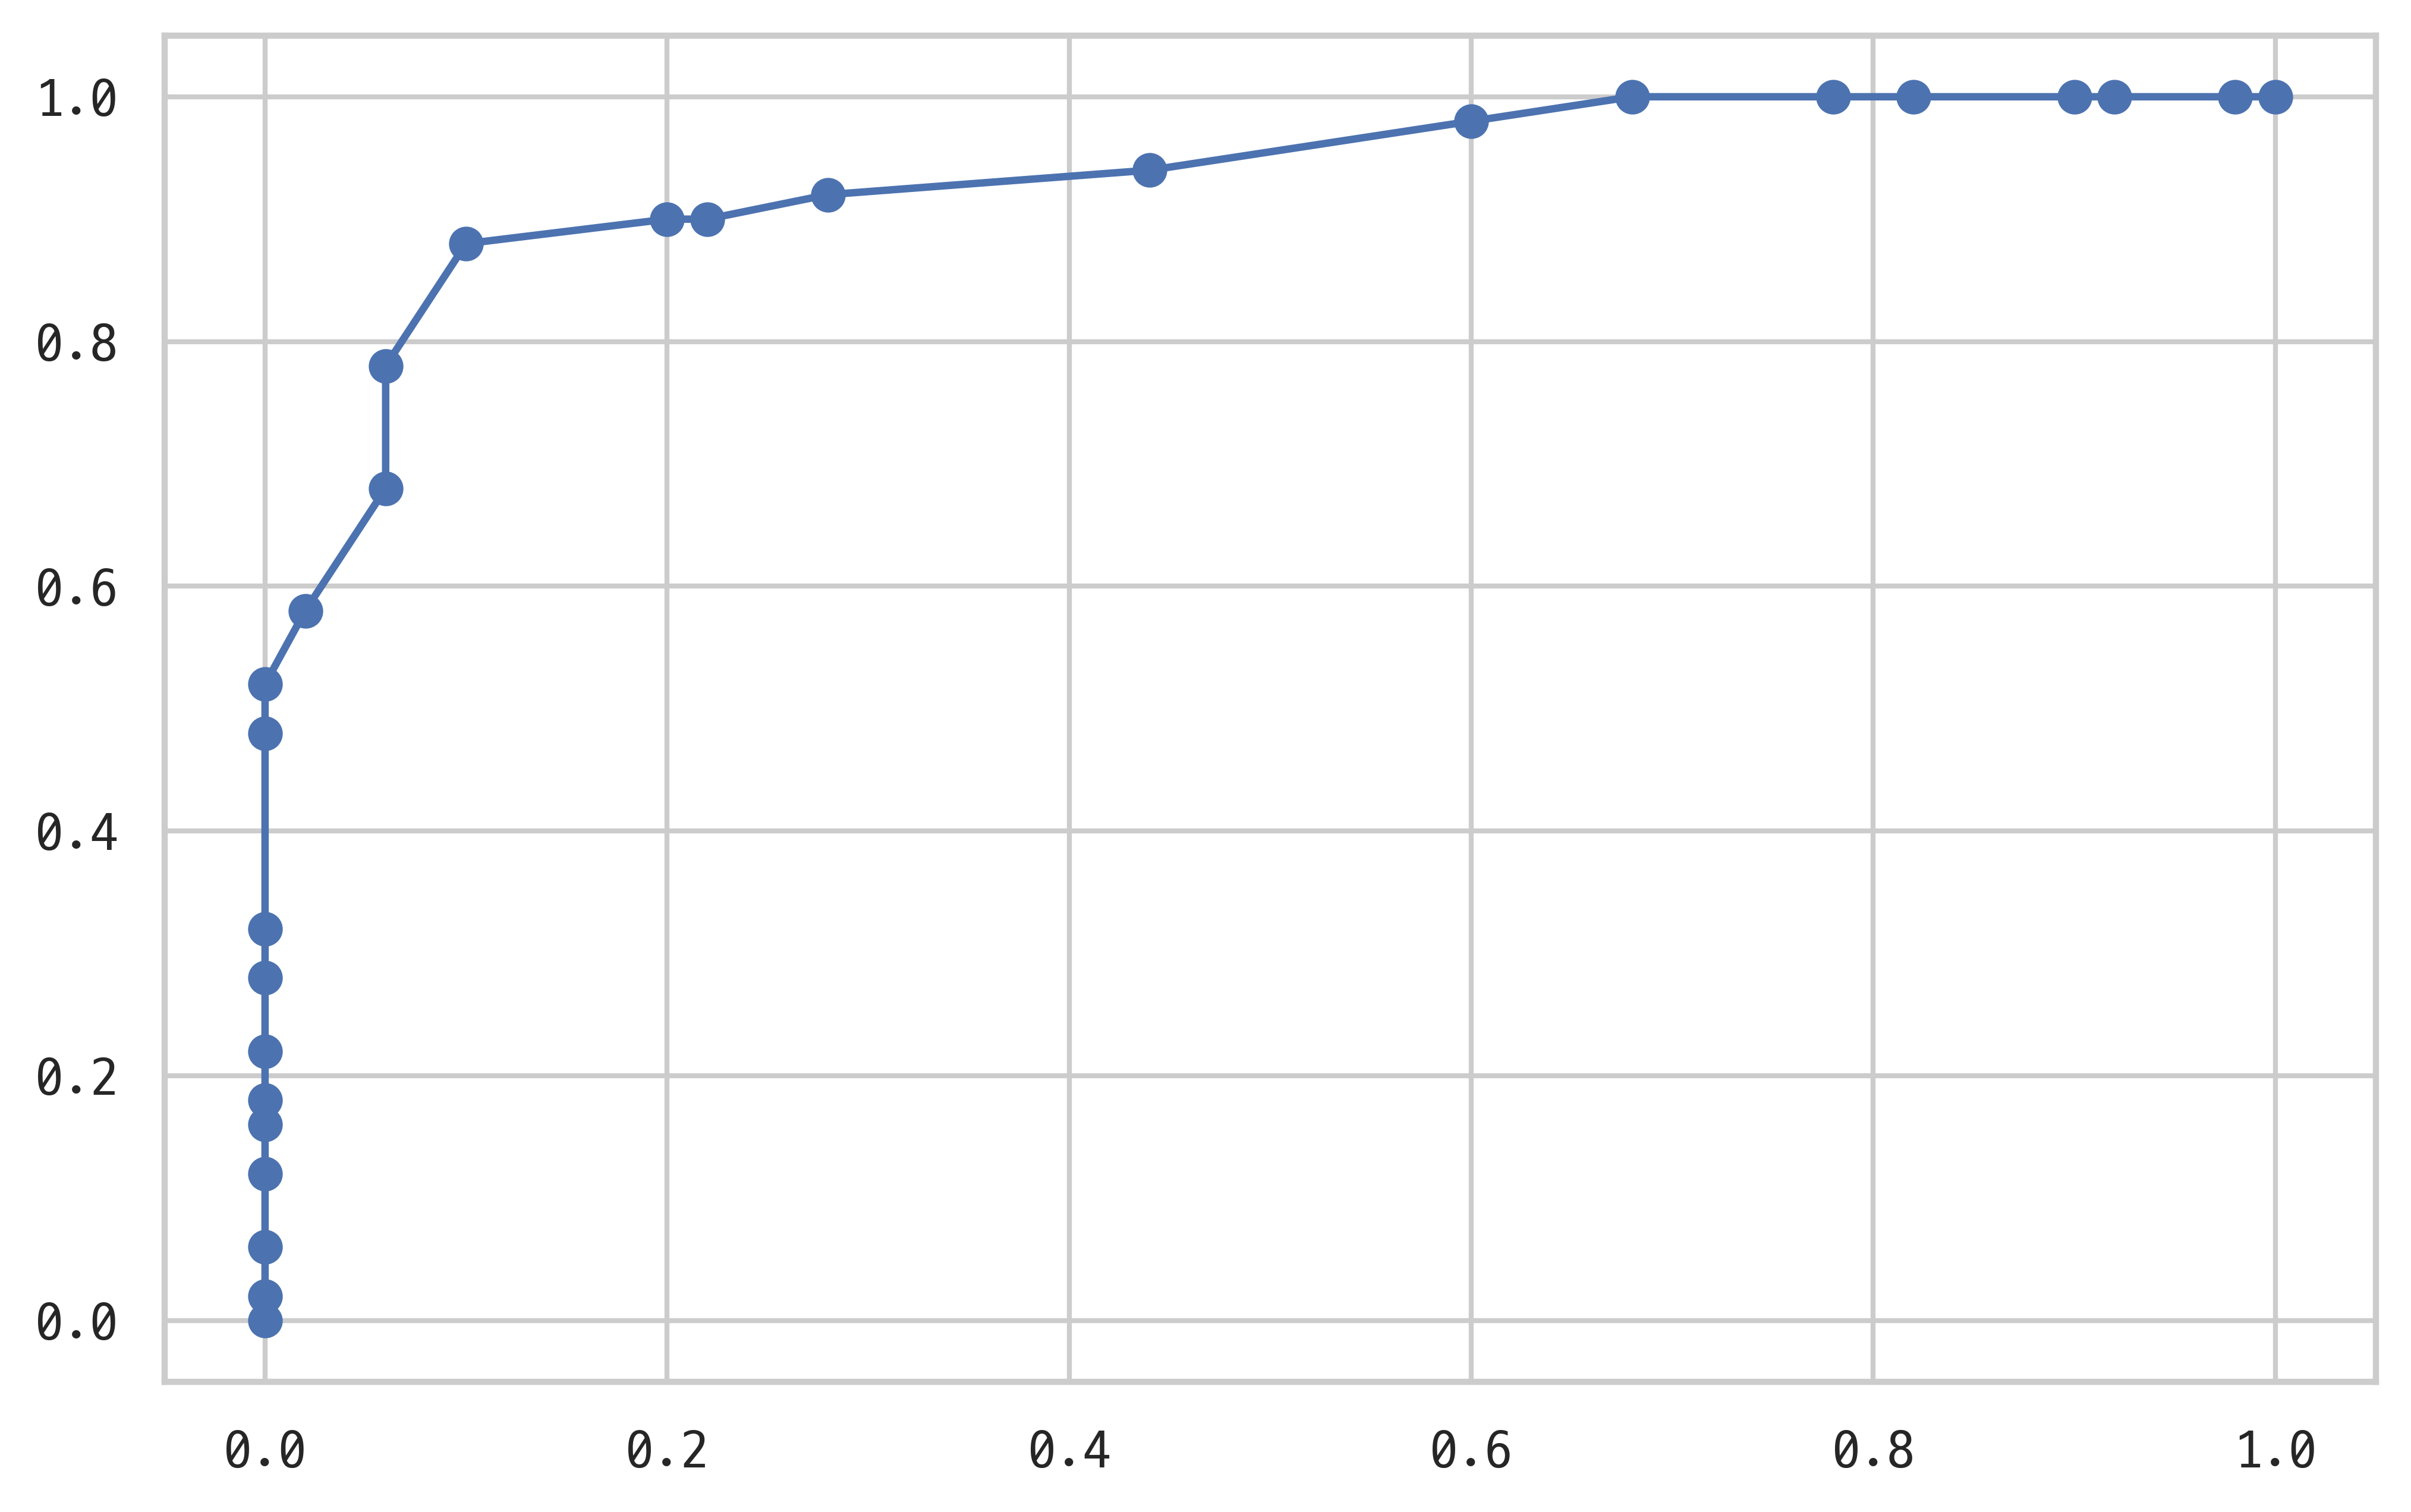

In [15]:
# 3 : ROC 커브 그리고 AUC 구해서 성능 검증하기
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)

plt.plot(fpr, tpr, 'o-')
plt.show()

In [6]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

#### 로지스틱 회귀를 사용한 이진 분류의 예

In [18]:
data_med = sm.datasets.get_rdataset('MedGPA', package='Stat2Data')
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


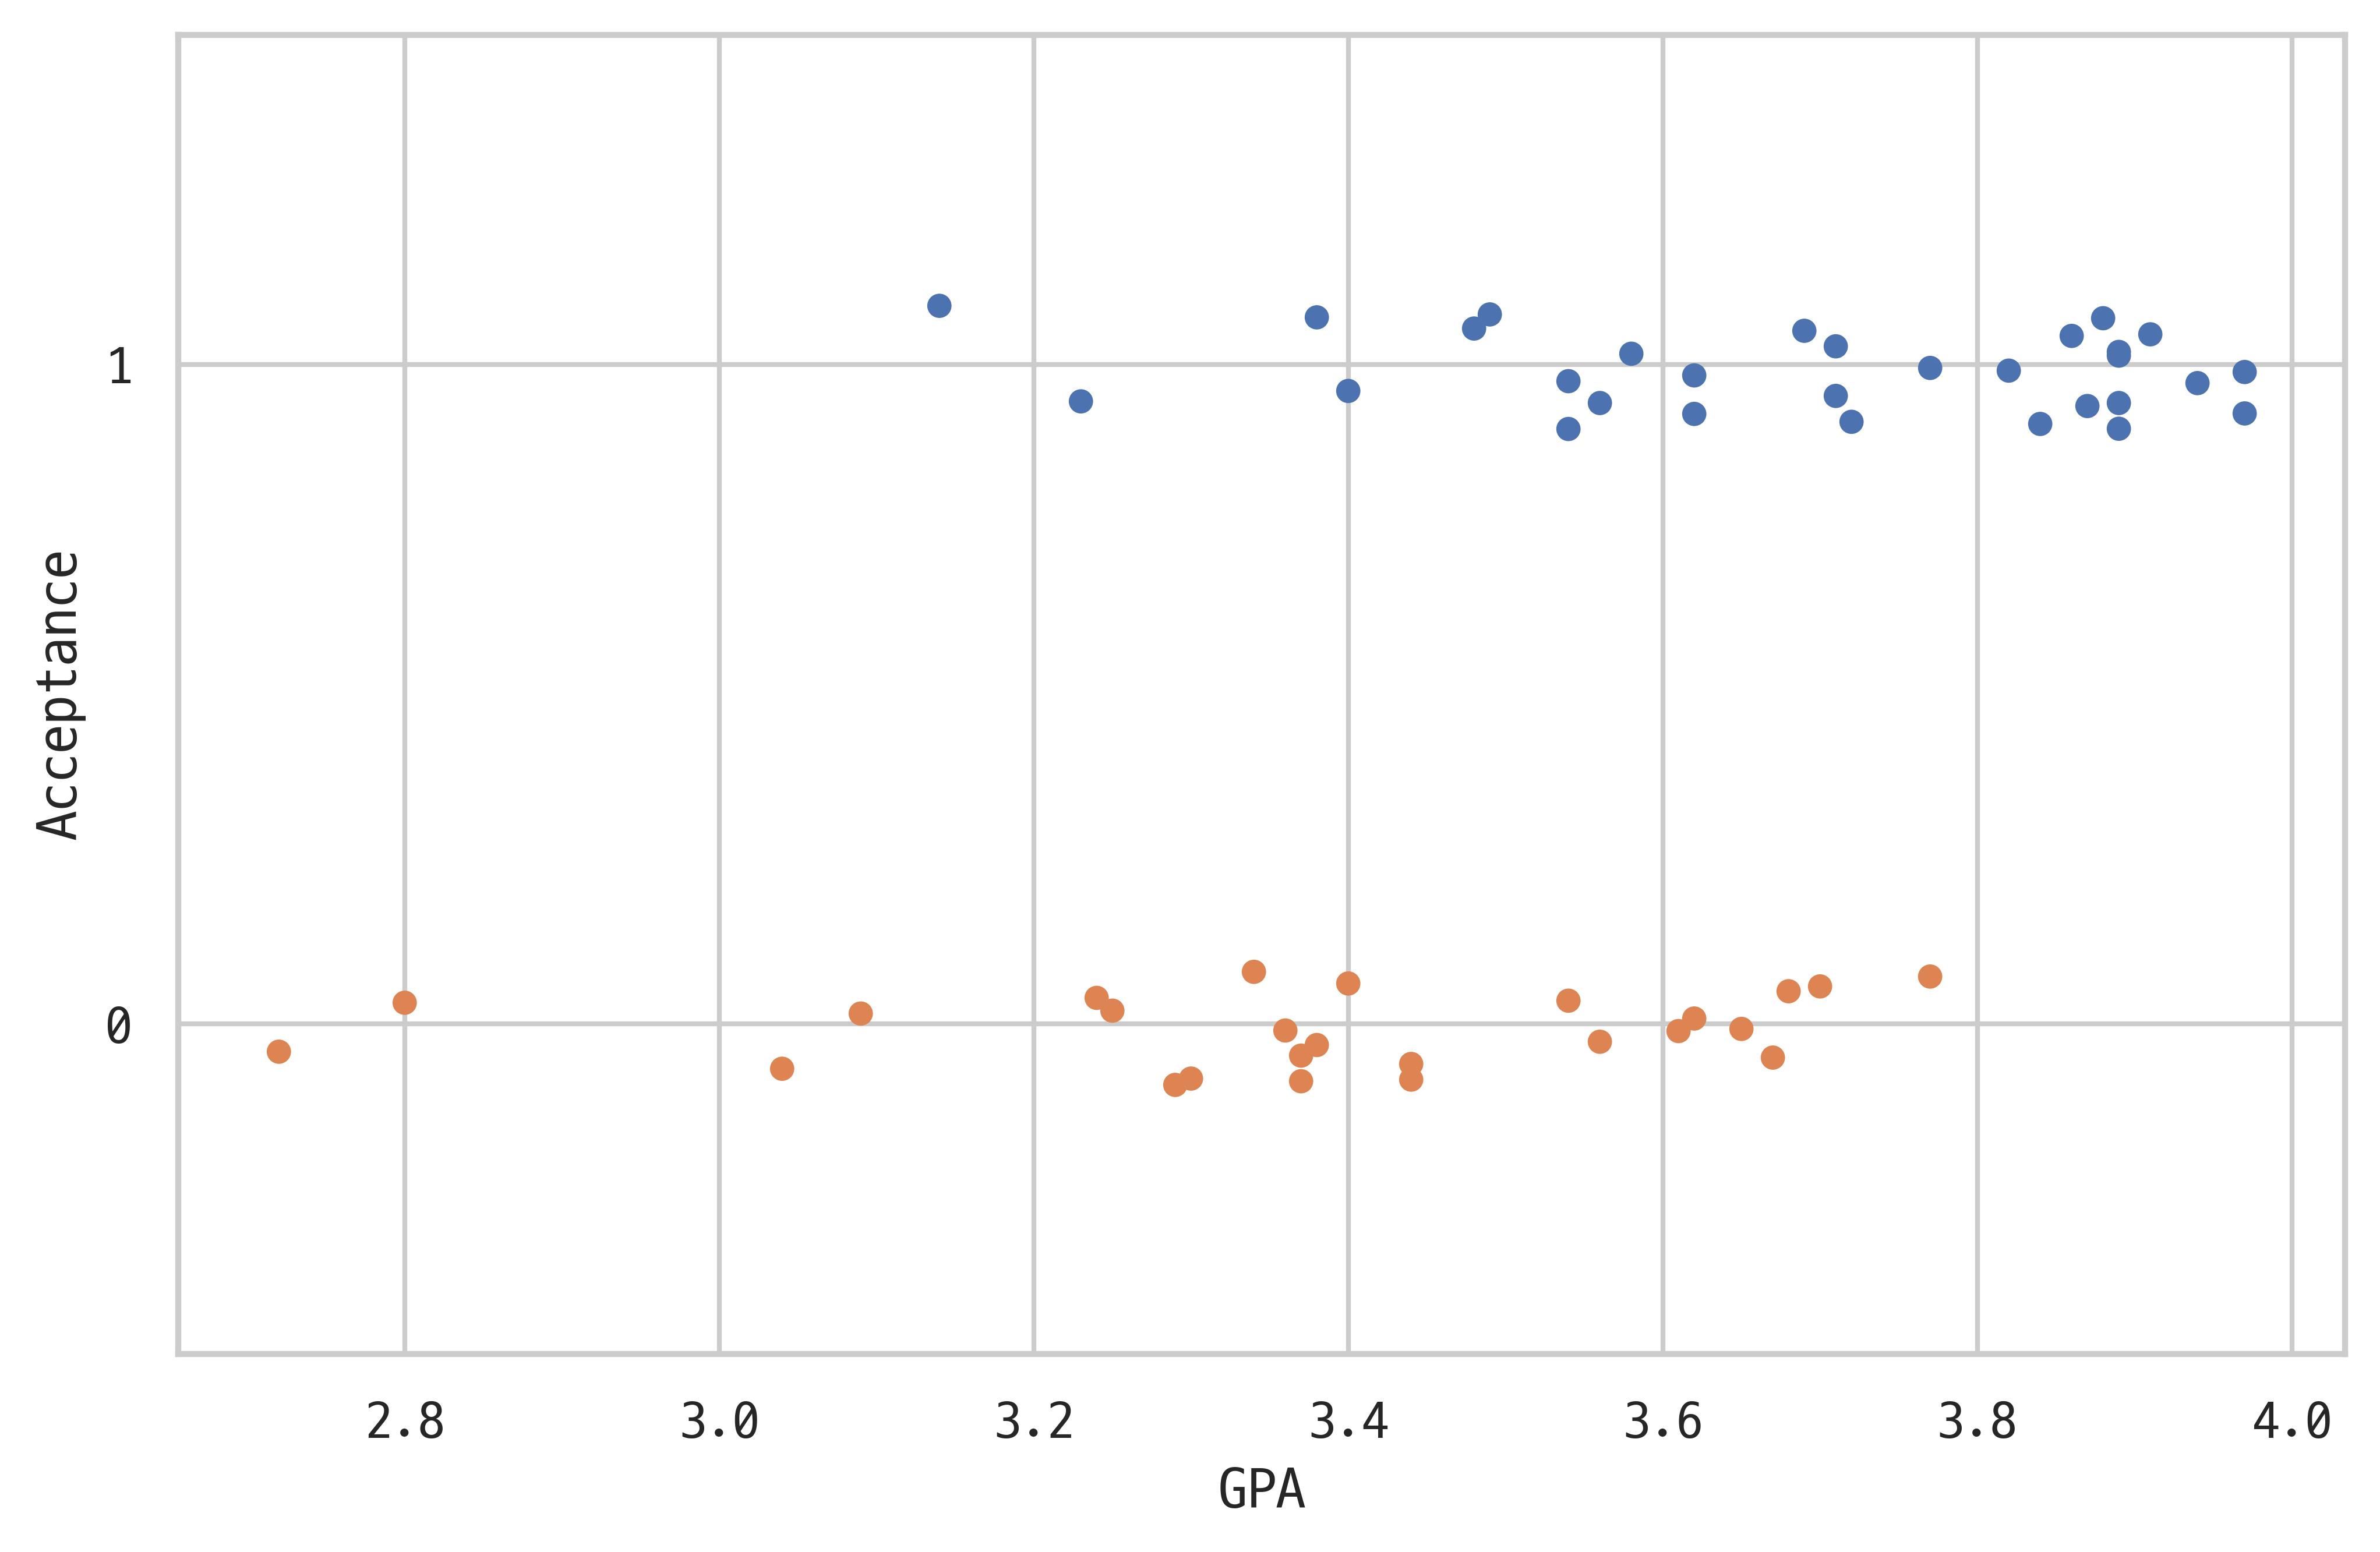

In [19]:
sns.stripplot(x='GPA', y='Acceptance', data=df_med, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [21]:
model_med = sm.Logit.from_formula('Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps', df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:                  0.5913
Time:                        00:05:23   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

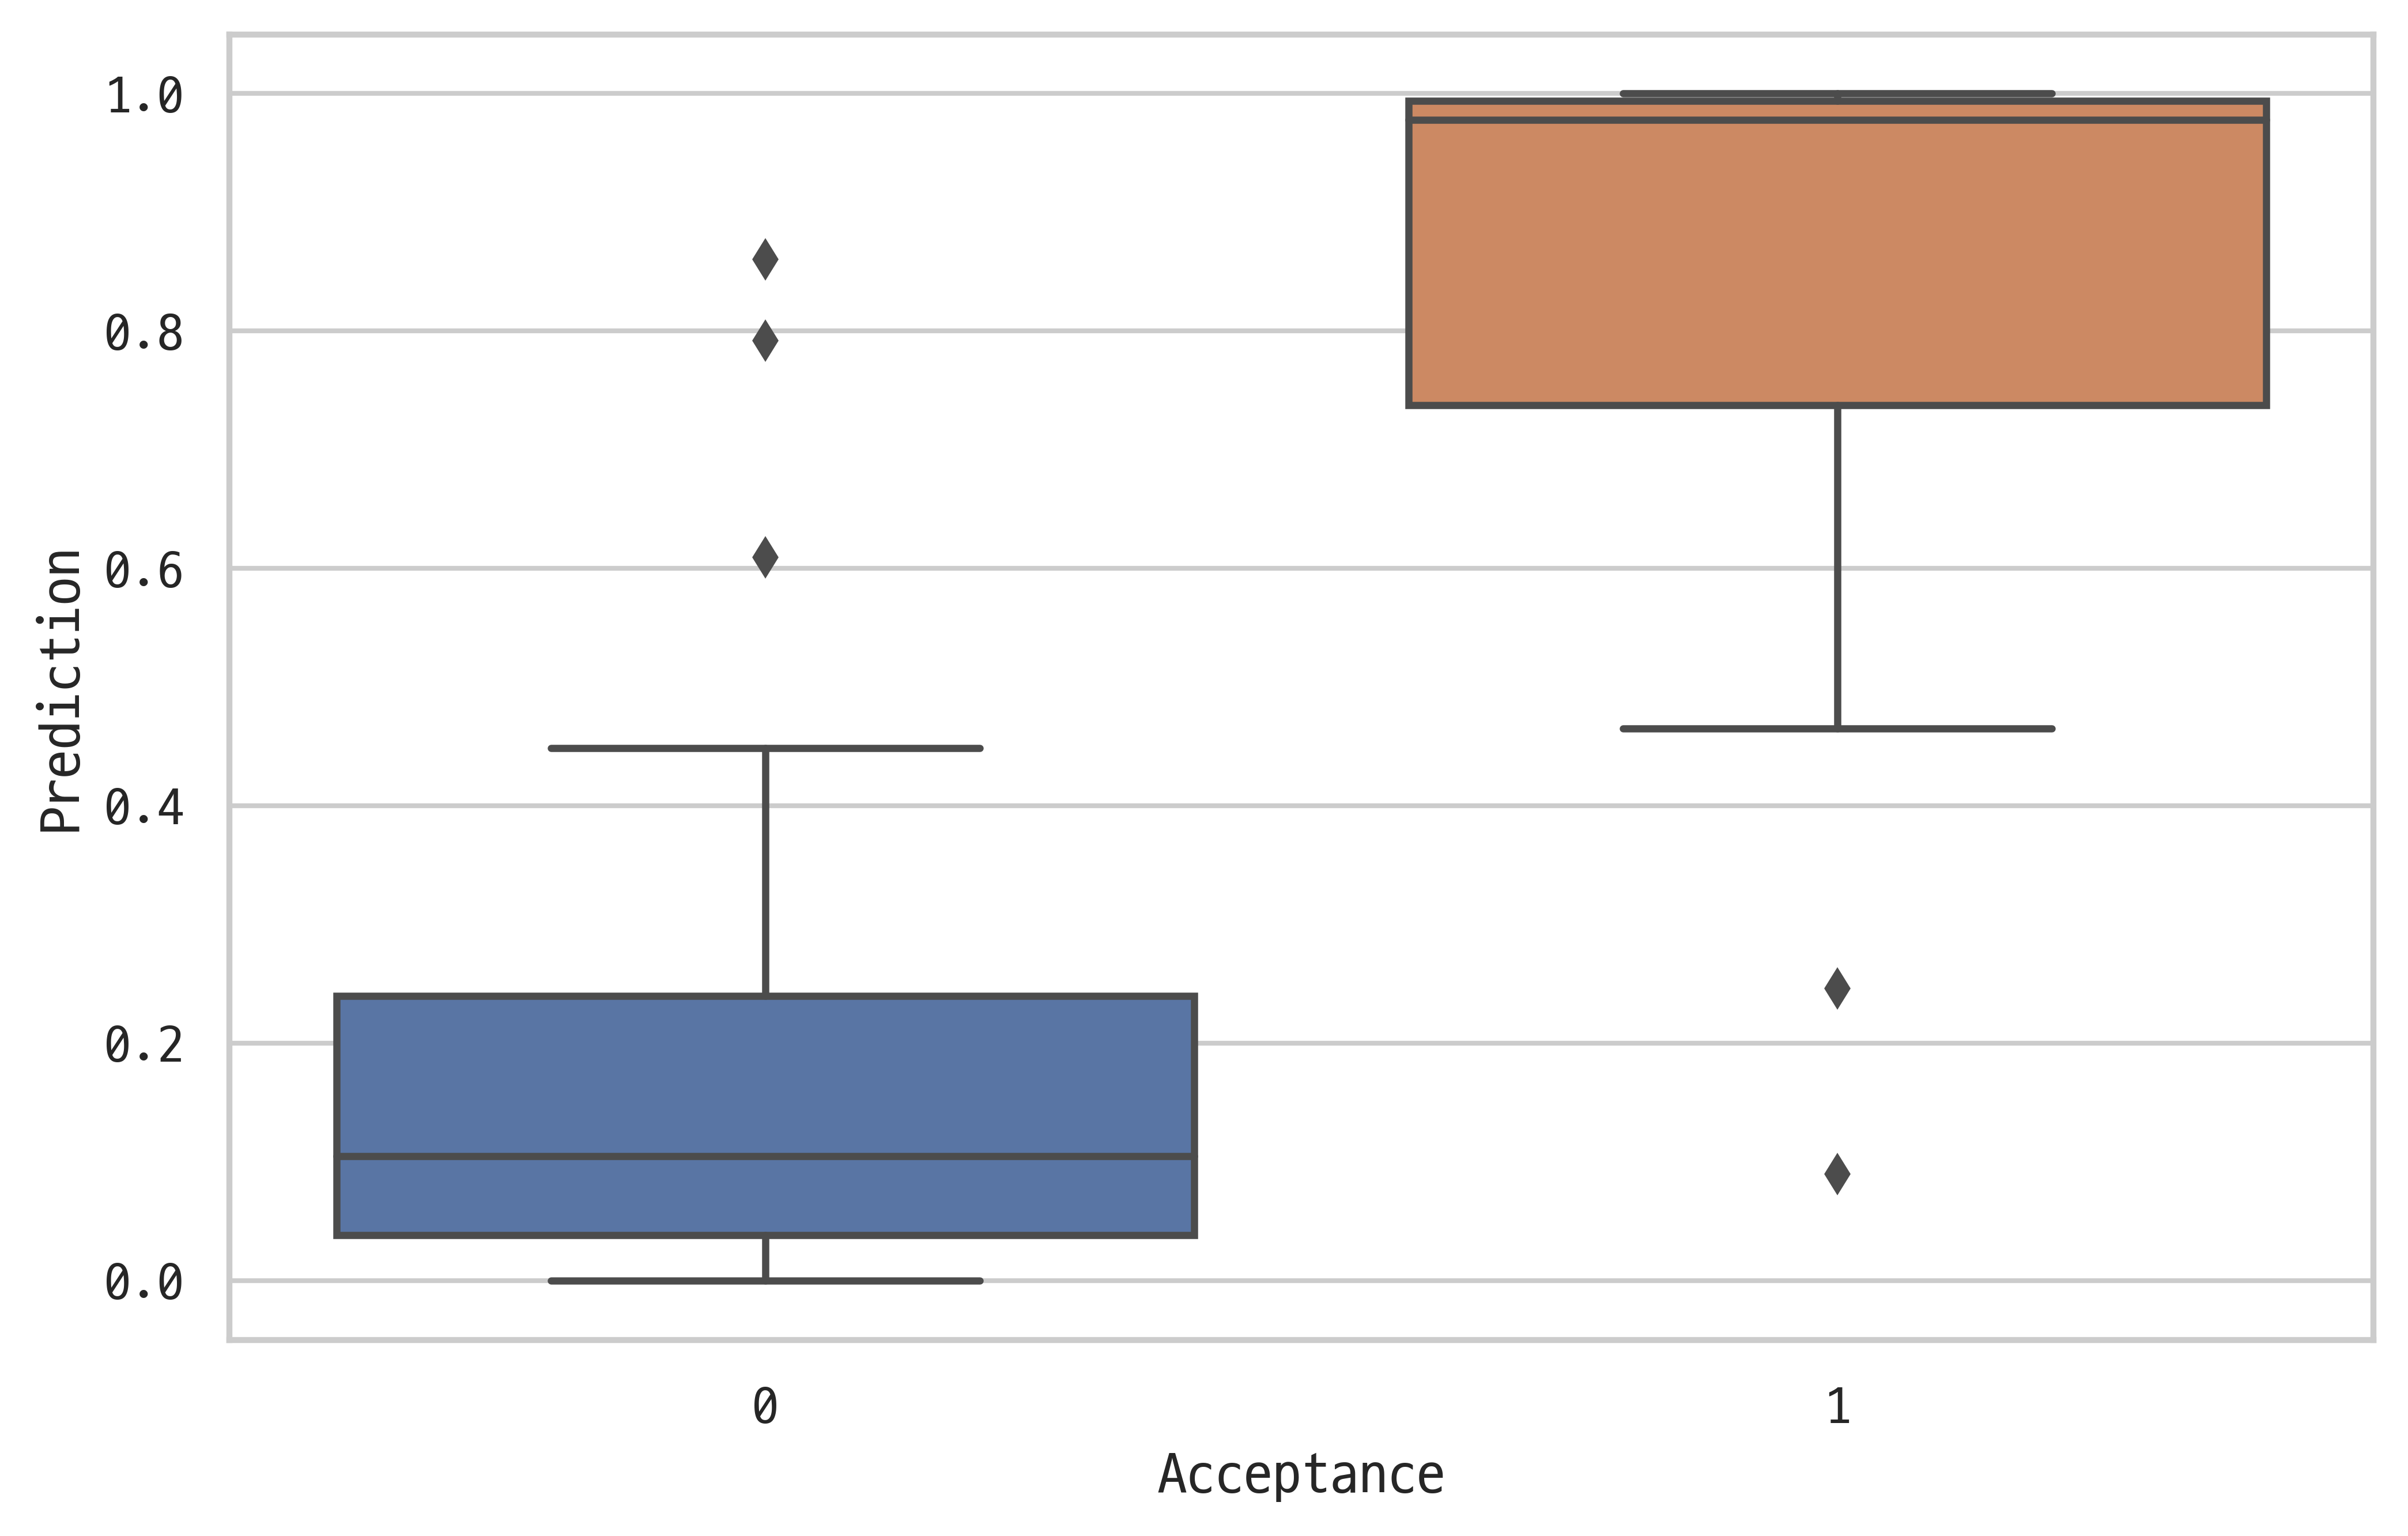

In [22]:
df_med['Prediction'] = result_med.predict(df_med)
sns.boxplot(x='Acceptance', y='Prediction', data=df_med)
plt.show()

In [23]:
model_med = sm.Logit.from_formula('Acceptance ~ PS + BS ', df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:                  0.3315
Time:                        00:12:49   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

#### Ex. 12.1.2

In [26]:
# 1 : 베르시칼라와 버지니카 데이터를 구분하는 로지스틱 회귀모형 생성

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=['species'])
df = pd.concat([dfX, dfy], axis=1)
df = df[df.species.isin([1, 2])]
df['species'] -= 1
df = df.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width',
})

model = sm.Logit.from_formula('species ~ sepal_length + sepal_width + petal_length + petal_width', data=df)
result = model.fit()
print(result.summary())

# from_formula 사용하지 않을 시 코드
# iris = load_iris()
# idx = np.in1d(iris.target, [1, 2])
# X0 = pd.DataFrame(iris.data[idx, :], columns=iris.feature_names[:])
# X = sm.add_constant(X0)
#y = iris.target[idx] - 1

# logit_mod = sm.Logit(y, X)
# logit_res = logit_mod.fit(disp=0)
# print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:                  0.9142
Time:                        00:36:49   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.465

In [27]:
# 1 : 경계면의 방정식 찾기
model = sm.Logit.from_formula('species ~ petal_length + petal_width', data=df)
result = model.fit()
print(result.summary())
# answer : if 5.7545pl + 10.4467pw - 45.2723 < 0.5, then versicolor, otherwise virginica

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:                  0.8517
Time:                        00:37:53   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -45.2723     13.612     -3.326      0.001     -71.951     -18.594
petal_length     5.754

In [30]:
# 2 : 분류결과표와 분류결과보고서로 표현하기
y_pred = result.predict(df) >= 0.5
confusion_matrix(df.species, y_pred)

array([[47,  3],
       [ 3, 47]], dtype=int64)

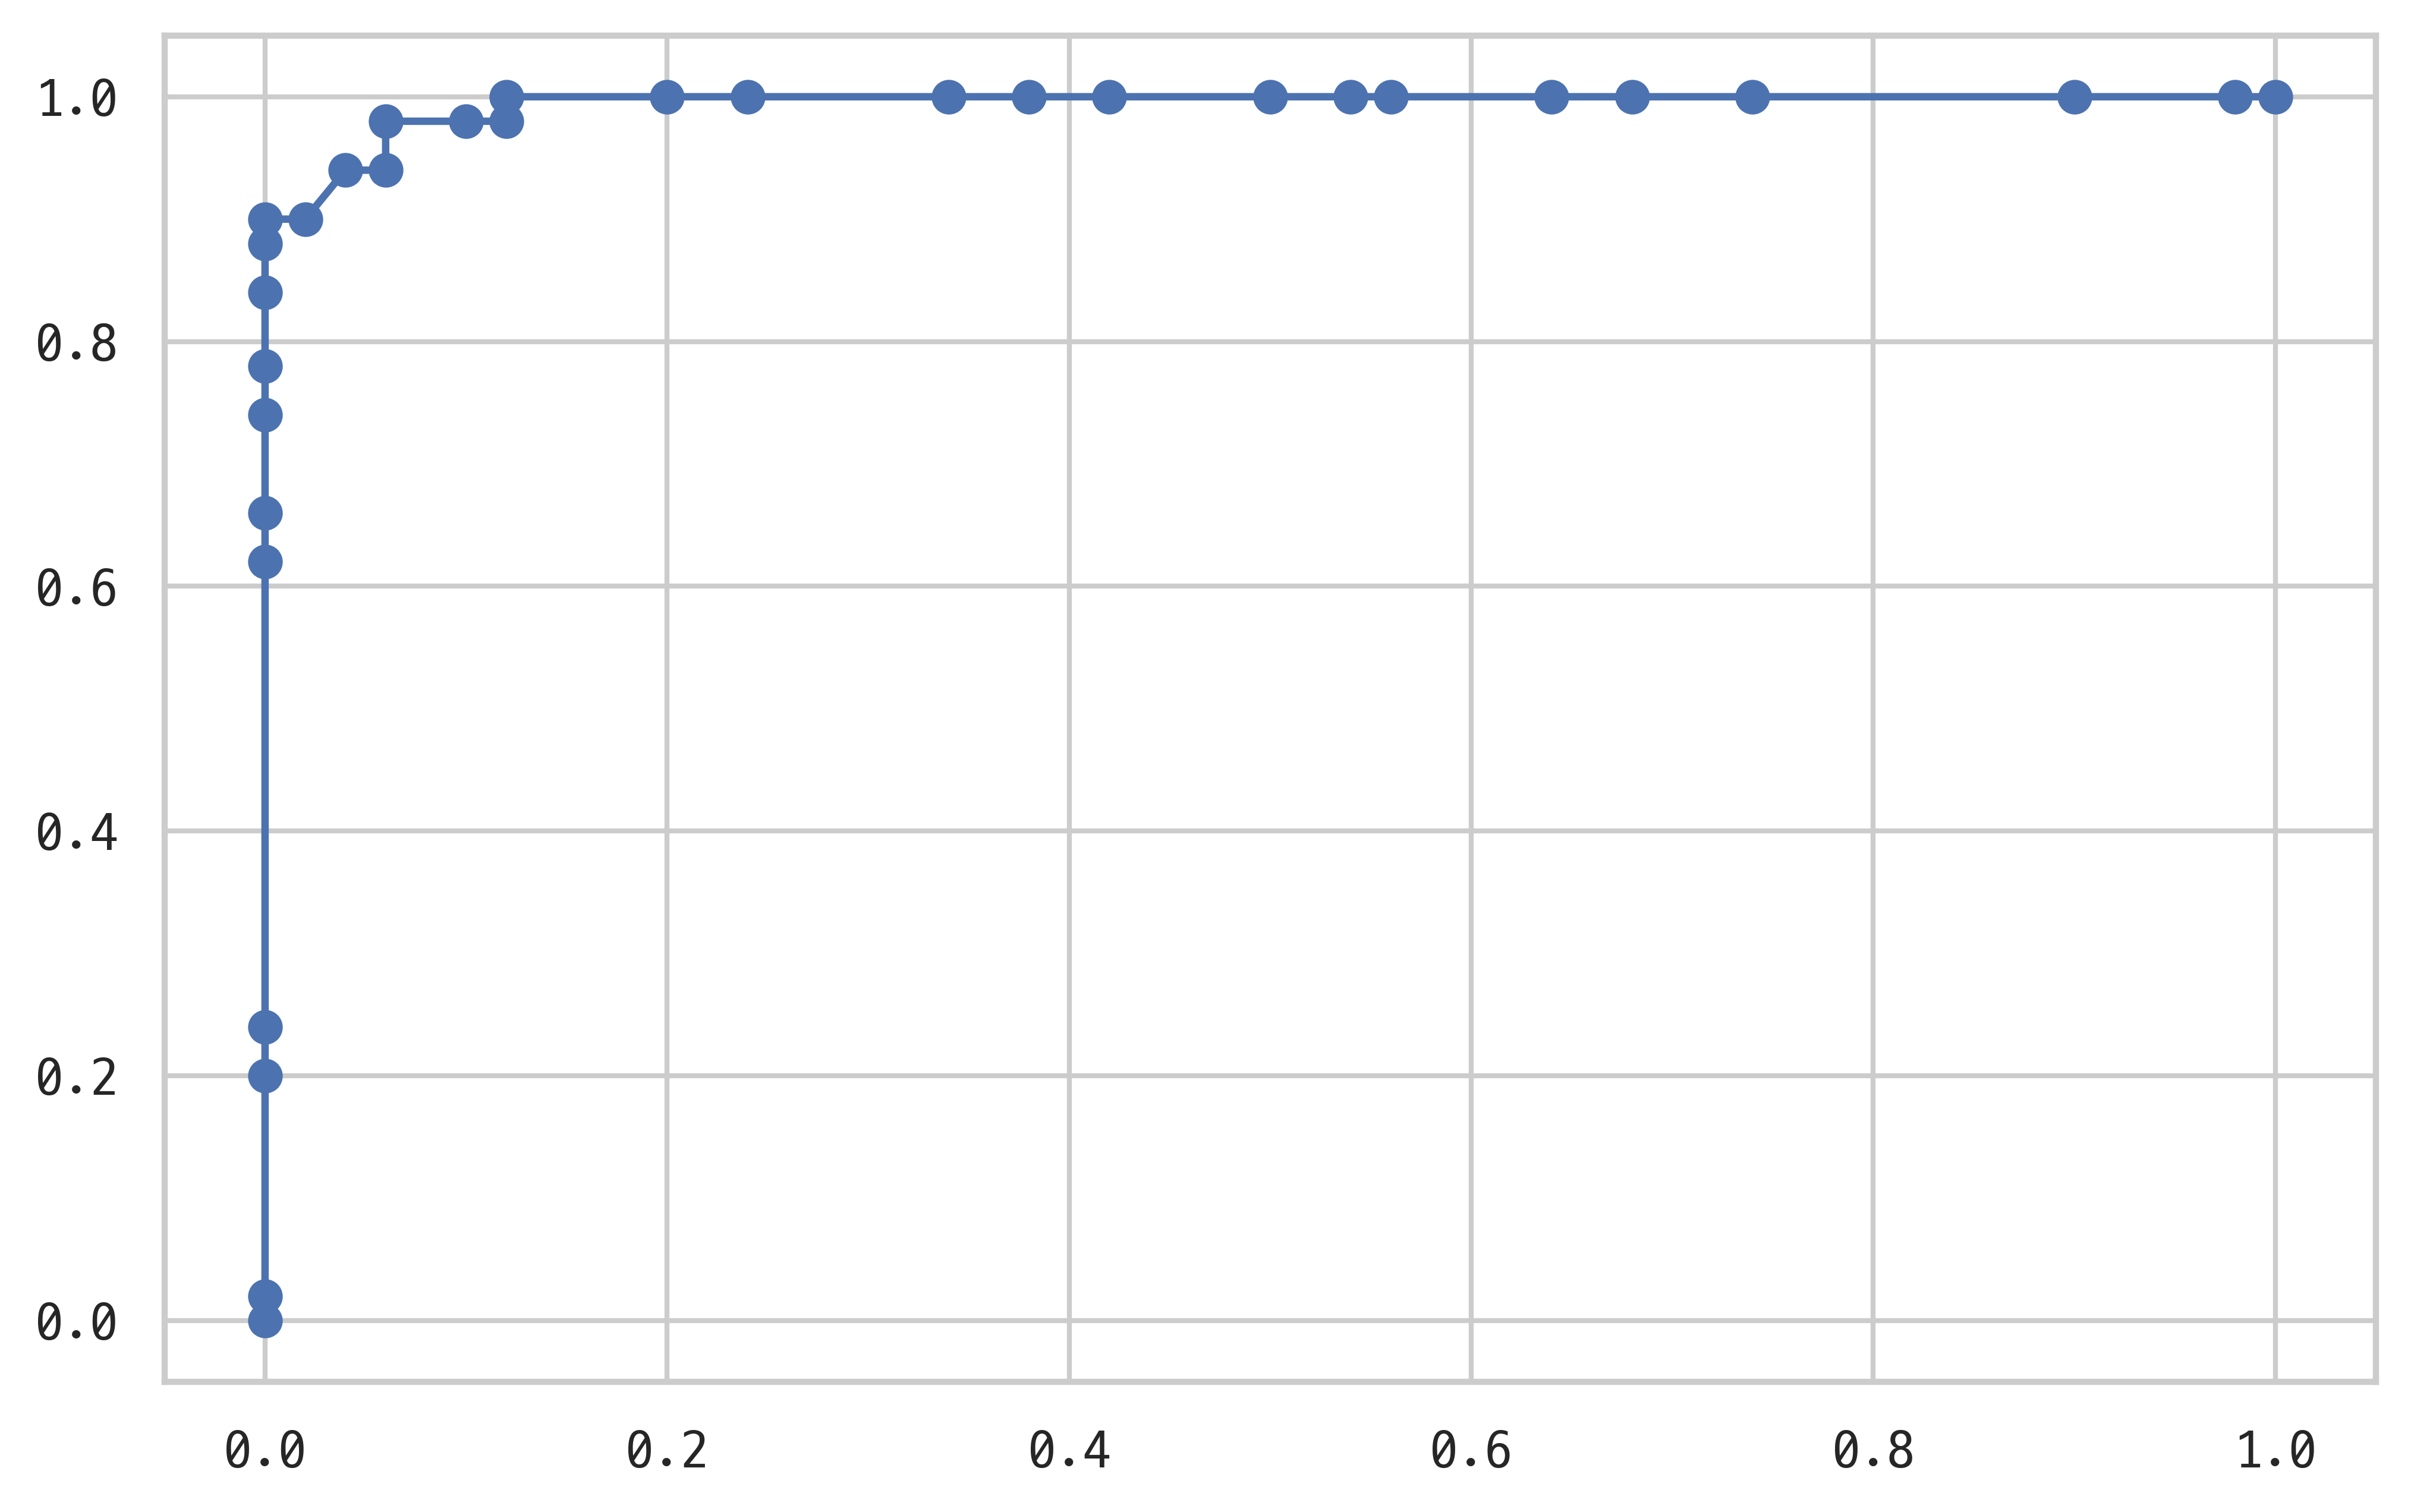

In [35]:
# 3 : ROC 커브 그리고 AUC 구해서 성능 검증하기
fpr, tpr, thresholds = roc_curve(df.species, result.fittedvalues)
plt.plot(fpr, tpr, 'o-')
plt.show()

In [36]:
auc(fpr, tpr)

0.994

#### 로지스틱 회귀를 사용한 회귀분석

In [38]:
data_whole = sm.datasets.get_rdataset('womensrole', package='HSAUR')
df_whole = data_whole.data
df_whole['ratio'] = df_whole.agree / (df_whole.agree + df_whole.disagree)
df_whole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


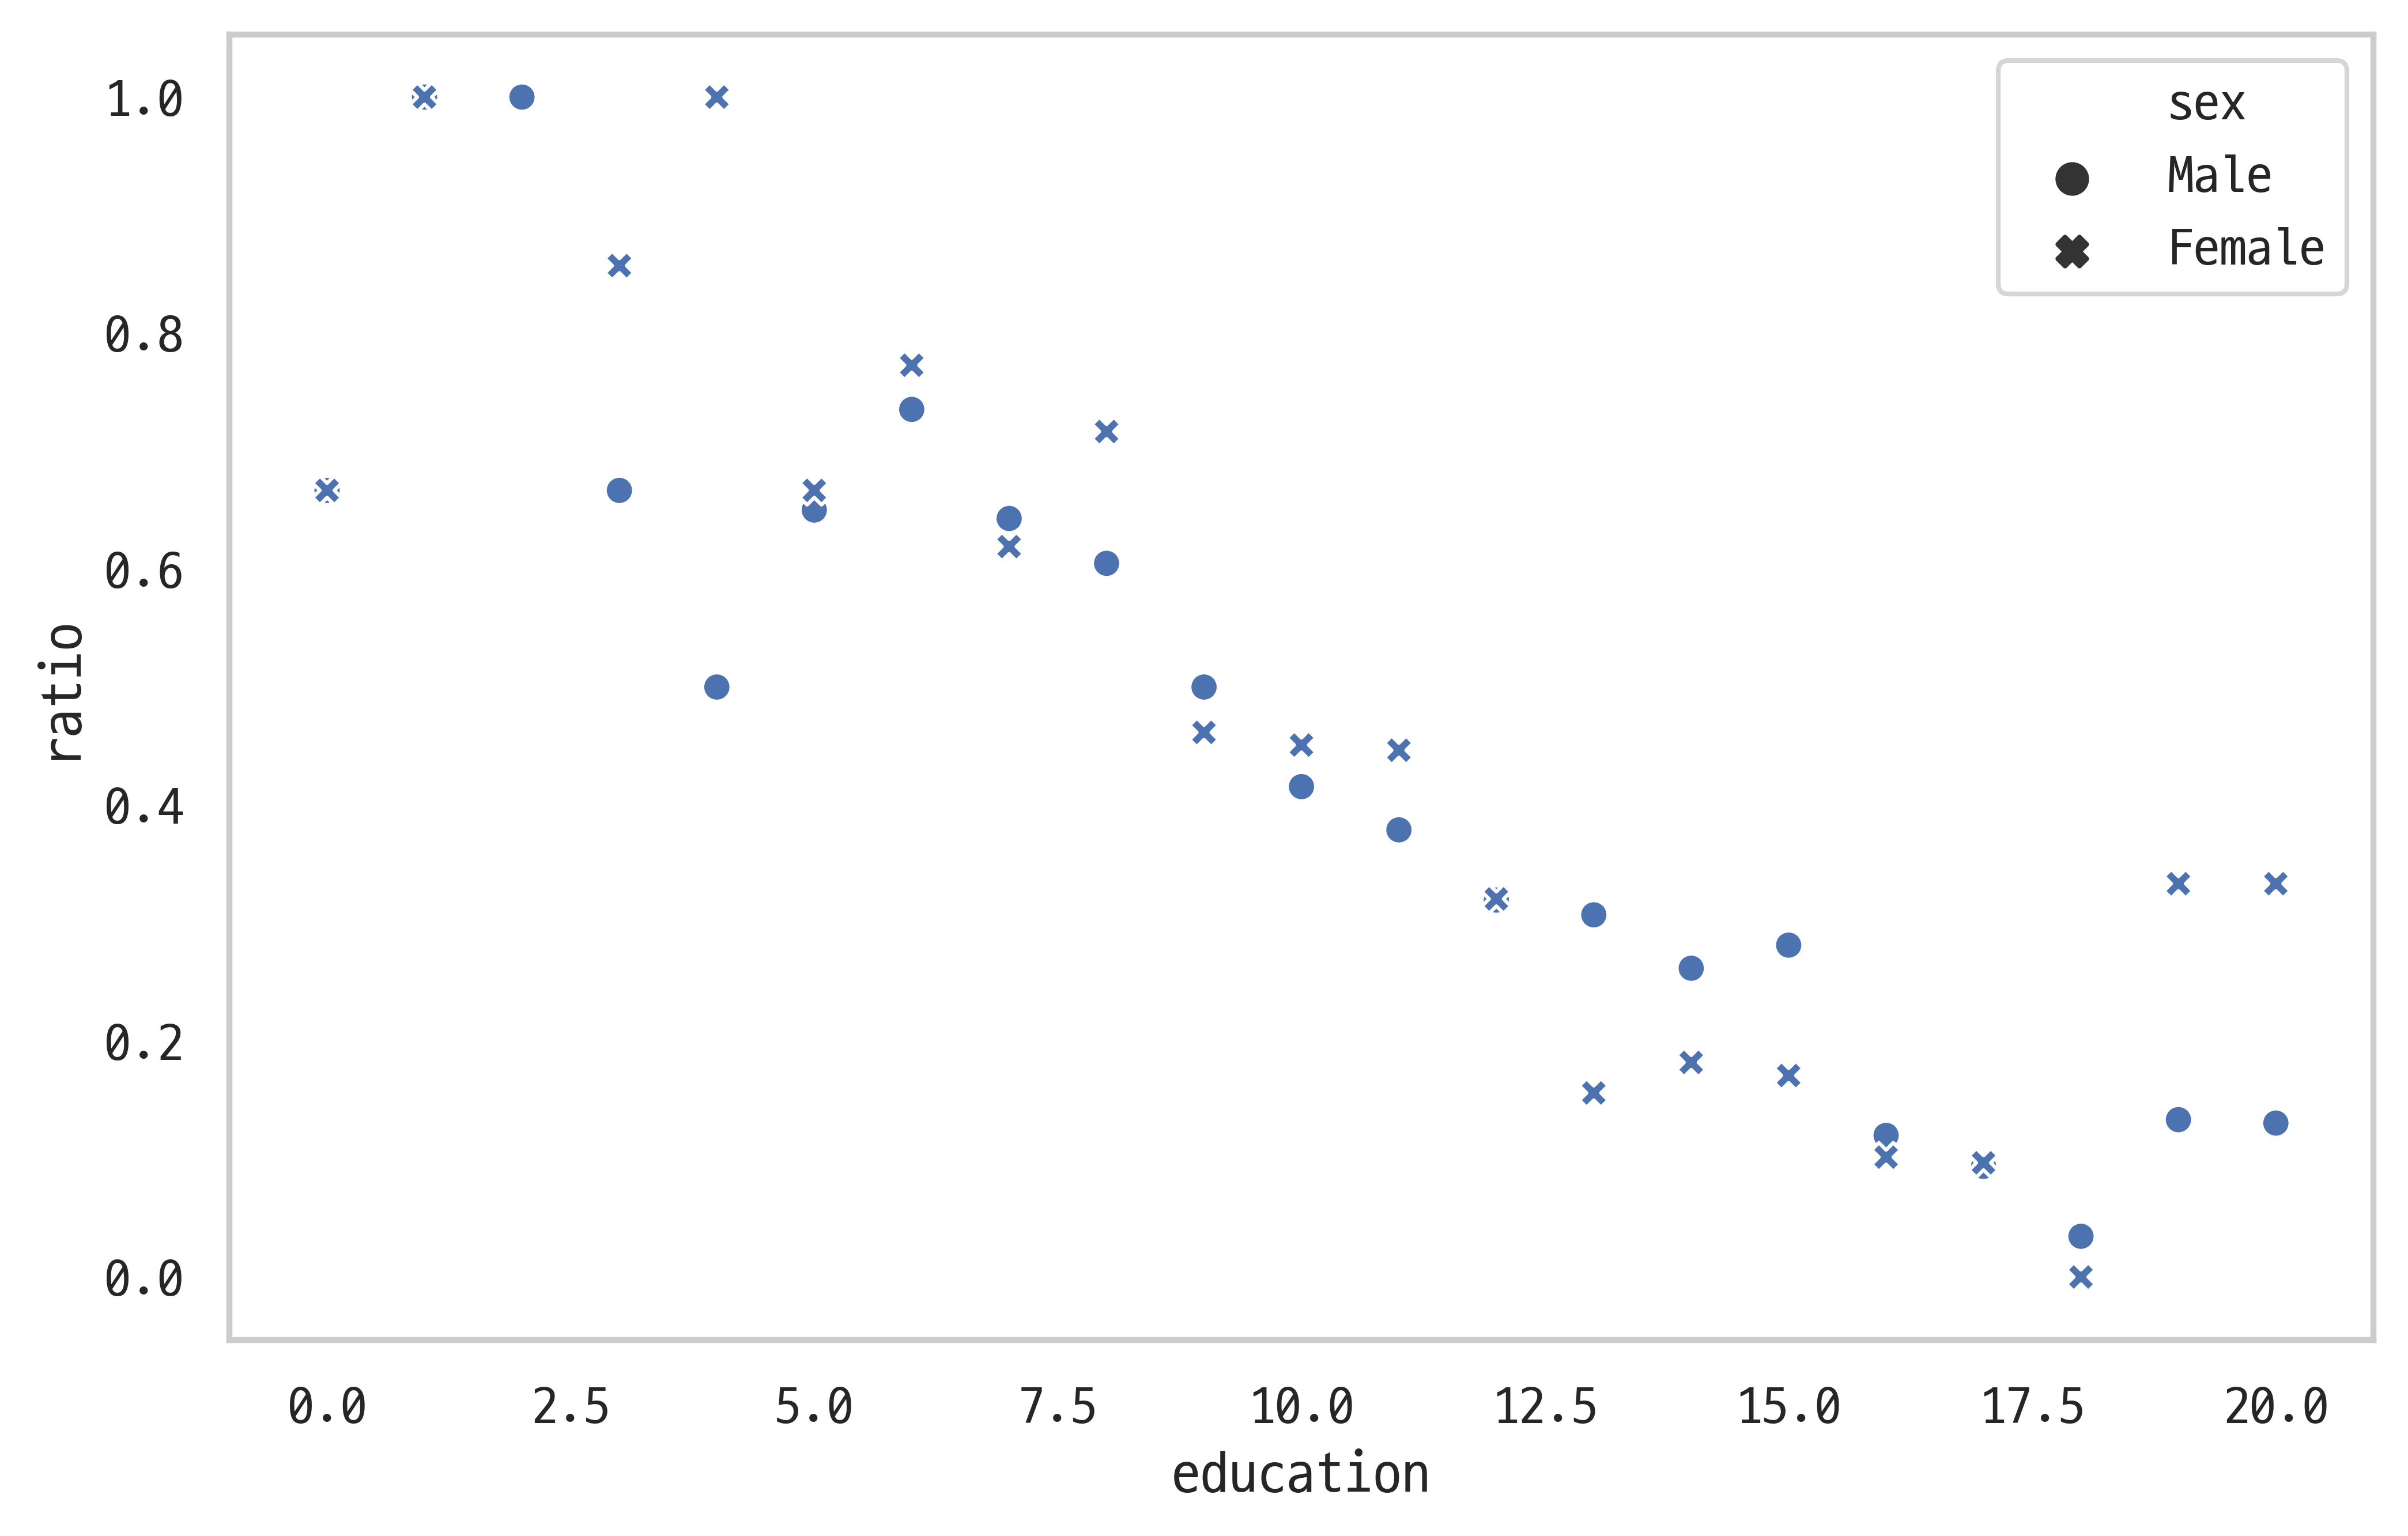

In [39]:
sns.scatterplot(x='education', y='ratio', style='sex', data=df_whole)
plt.grid(False)
plt.show()

In [40]:
model_whole = sm.Logit.from_formula('ratio ~ education + sex', df_whole)
result_whole  = model_whole.fit()
print(result_whole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:                  0.3435
Time:                        00:57:47   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [41]:
model_whole2 = sm.Logit.from_formula('ratio ~ education', df_whole)
result_whole2  = model_whole2.fit()
print(result_whole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:                  0.3422
Time:                        00:58:56   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

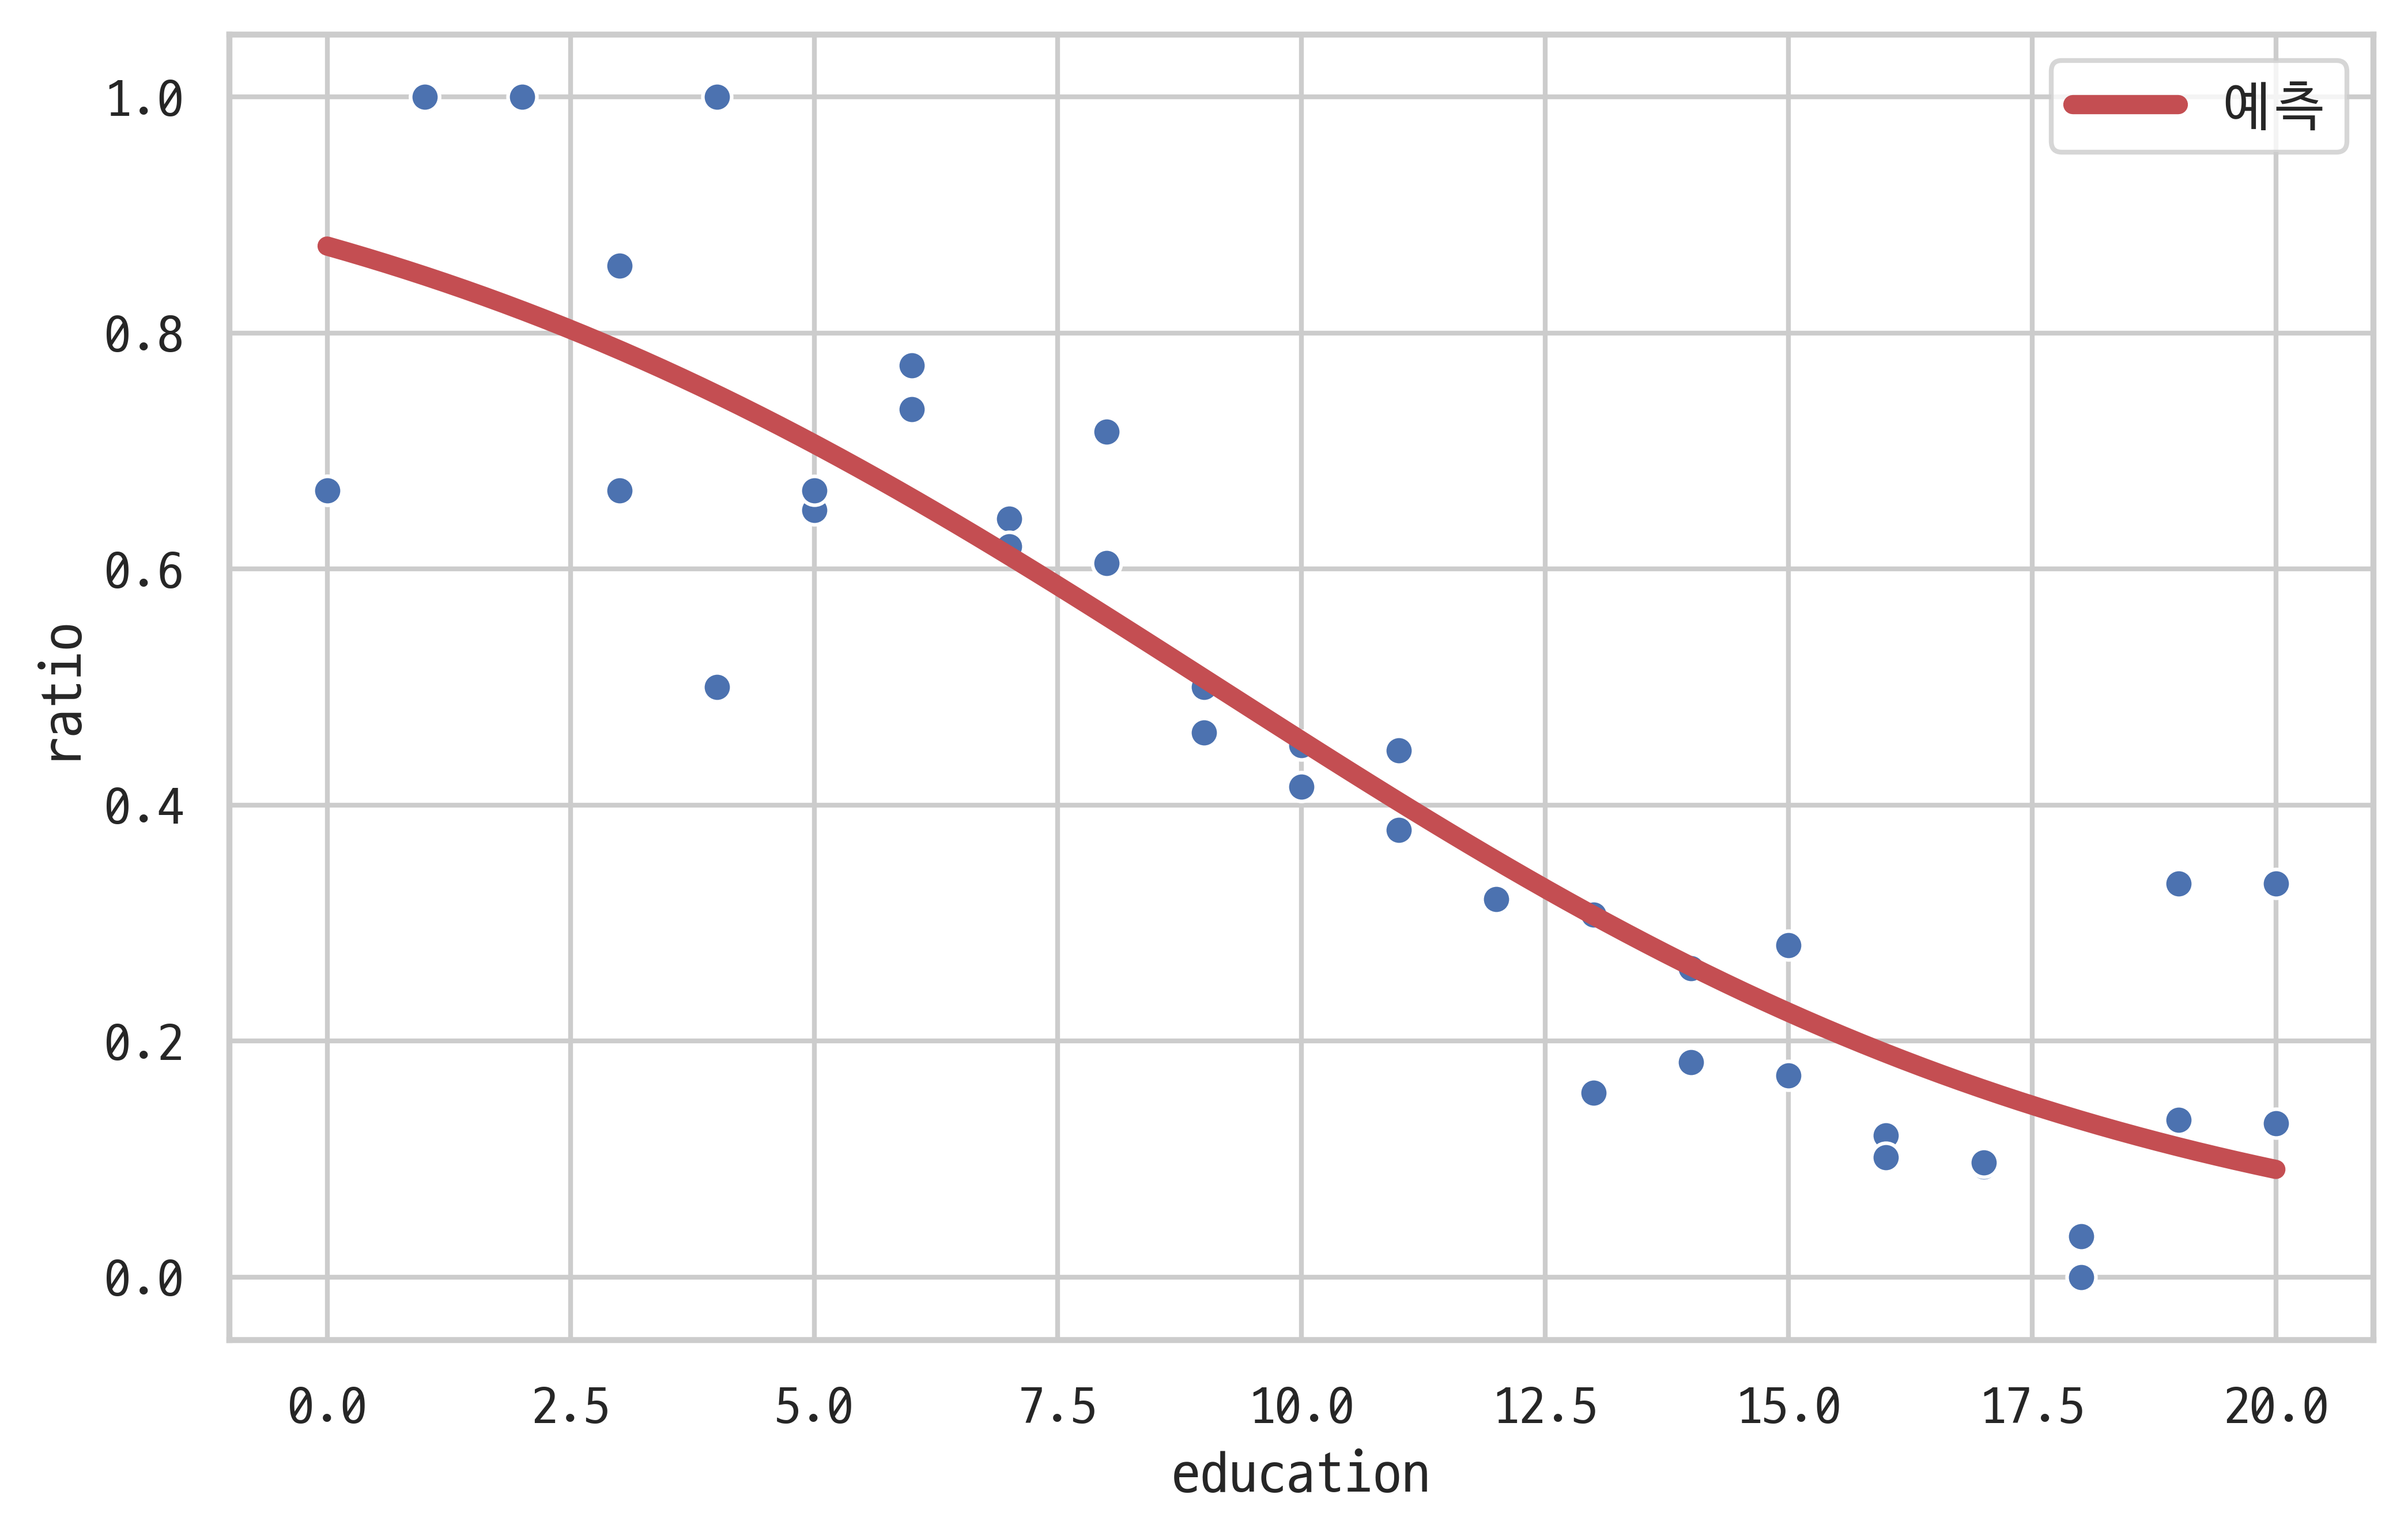

In [42]:
sns.scatterplot(x='education', y='ratio', data=df_whole)
xx = np.linspace(0, 20, 100)
df_whole_p = pd.DataFrame({'education': xx})
plt.plot(xx, result_whole2.predict(df_whole_p), 'r-', lw=4, label='예측')
plt.legend()
plt.show()